Stacked LSTM, BiLSTM, and NeuralProphet for Univariate Time Series

The development of deep learning LSTM, BiLSTM, and NeuralProphet models for multi-step stock price forecasting

Libraries should be imported

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

For data preprocessing, visualization, and modeling, this code imports several libraries and modules. 

In the first step, it imports the 'numpy' library as 'np' and the 'pandas' library as 'pd', which are commonly used for numerical operations and data manipulation. 

After that, it imports the 'preprocessing' module from the 'sklearn' (scikit-learn) library, which provides tools for data preprocessing and feature scaling. 

Secondly, it imports the 'train_test_split' function from the 'model_selection' module of 'sklearn' so that the data can be split into training and testing sets for model testing.

The code also imports the 'rcParams' module from the 'matplotlib.pylab' library, which allows customization of matplotlib's default properties and settings. 

For working with date and time information, it imports the 'datetime' module. 

To suppress any warning messages that may arise during code execution, the 'warnings' module is imported. 

For efficient iteration, the 'itertools' module is imported. 

A time series forecasting library developed by Facebook, 'fbprophet', is imported as 'Prophet'. 

In IPython, the 'IPython' module supports interactive computing. 

To create visualizations, the 'pyplot' module is imported from the 'matplotlib' library. 

To interact with the operating system, such as accessing files and directories, the 'os' module is imported. 

For regular expression operations, the 're' module is imported. 

Statistical data visualization is performed using the 'seaborn' library. 

Plotly.express is imported as 'px', which provides an easy-to-use interface for creating interactive visualizations. 

The 'matplotlib.patches' module can also be imported to create custom visualization patches. This code provides a foundation for subsequent operations on data by setting up libraries and modules for data analysis, preprocessing, visualization, and modeling.

Data loading + preprocessing + feature transformation

In [ ]:
data = pd.read_csv('AAPL.csv')

In this code, a CSV file named 'AAPL.csv' is read and its contents are stored in a variable called 'data'. 

In this case, the 'pd' prefix indicates that the 'read_csv' function is being called from the 'pandas' library. 

For storing tabular data, CSV stands for Comma-Separated Values. 

The code reads the contents of the CSV file and creates a pandas DataFrame, which is a two-dimensional tabular data structure. 

By assigning the DataFrame to the variable 'data', the data stored in the CSV file can be further manipulated and analyzed. 

The purpose of this line of code is to retrieve the data from a specified CSV file and prepare it for further processing.

In [ ]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

This code removes certain columns from a DataFrame named 'data' and assigns the modified DataFrame to a new variable called 'data_feature_selected'. Specific columns are eliminated using the 'drop' method. The 'axis=1' parameter indicates that the columns are being dropped, while 'labels=['Open','High','Low','Close','Volume']' specifies the names of the columns to be removed. The columns 'Open', 'High', 'Low', 'Close', and 'Volume' are removed from the DataFrame. There is likely to be information related to stock market data in these columns, such as opening and closing prices and trading volumes. The 'data_feature_selected' DataFrame will only retain the remaining columns, which could represent other data attributes or features. For further analysis or modeling, this code is useful when you wish to focus on specific features of the data and exclude irrelevant or redundant columns.

In [ ]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

It reorders the columns of the 'data_feature_selected' DataFrame so that 'Date' is the first column and 'Adj Close' is the second column. The variable 'col_order' contains a list of column names in the desired order: 'Date' and 'Adj Close'. In the 'reindex' method, the 'columns' parameter is specified as 'col_order' in the 'data_feature_selected' DataFrame. The DataFrame is reindexed to match the column order specified. As a result, the 'data_feature_selected' DataFrame is modified to have 'Date' as the first column and 'Adj Close' as the second column, while any remaining columns, if any, remain the same. The code concludes by reordering the columns for visualizing or analyzing the data in a particular arrangement, particularly when certain columns are of particular interest or significance. Displaying the modified 'data_feature_selected' DataFrame, reflecting the reordering of columns.

In [ ]:
data_feature_selected['differenced_trasnformation_demand'] = data_feature_selected['Adj Close'].diff().values
data_feature_selected.head()

This code calculates the difference between consecutive values in the 'Adj Close' column of the 'data_feature_selected' DataFrame and assigns the resulting differences to a new column called 'differenced_transformation_demand'.

On the 'Adj Close' column, the '.diff()' method computes the difference between each element and its preceding element. A change or rate of change between consecutive values is calculated using this operation. In the 'data_feature_selected' DataFrame, the resulting differences are extracted as a NumPy array, and then assigned to the 'differenced_transformation_demand' column. By performing this differencing transformation, we obtain a new column that represents the change in demand or value for each consecutive pair of observations in the 'Adj Close' column. 'head()' method is called on the 'data_feature_selected' DataFrame to display the first few rows, enabling us to inspect the newly added 'differenced_transformation_demand' column alongside the existing columns. For further analysis and modeling, this differencing operation is used to convert a series with temporal dependence into a stationary series.

In [ ]:
data_feature_selected['differenced_demand_filled'] = np.where(pd.isnull(data_feature_selected['differenced_trasnformation_demand']), data_feature_selected['Adj Close'], data_feature_selected['differenced_trasnformation_demand'])
data_feature_selected.head()

The code replaces missing values in the 'differenced_transformation_demand' column of the 'data_feature_selected' DataFrame with values from the 'Adj Close' column. A conditional assignment is applied to each element in the 'differenced_transformation_demand' column using the 'np.where()' function. If a value in the 'differenced_transformation_demand' column is null (missing), the corresponding element in the 'differenced_demand_filled' column is set to the 'Adj Close' value at the same position if the value is null. As an alternative, if a value in the 'differenced_transformation_demand' column isn't null, which means it already has a valid value, it will remain in the 'differenced_demand_filled' column. By replacing missing values in the 'differenced_transformation_demand' column with values from the 'Adj Close' column, this algorithm ensures that no null values remain in the dataset. We can then examine the modified 'differenced_demand_filled' column and its values by using the 'head()' method of the 'data_feature_selected' DataFrame.

In [ ]:
data_feature_selected['differenced_inv_transformation_demand'] = data_feature_selected['differenced_demand_filled'].cumsum()
np.testing.assert_array_equal(data_feature_selected['Adj Close'].values, data_feature_selected['differenced_inv_transformation_demand'].values)

To obtain a cumulative sum of the values in the 'differenced_demand_filled' column of the 'data_feature_selected' DataFrame, this code performs an inverse transformation.

The 'cumsum()' method is called on the 'differenced_demand_filled' column, which calculates the cumulative sum of each value in the column. Consequently, each value in the 'differenced_inv_transformation_demand' column represents the sum of all preceding values. By applying the inverse transformation, we obtain a new column that represents the accumulated values, effectively reversing the differencing operation previously applied. A comparison between the values of the 'Adj Close' column and the values of the 'np.testing.assert_array_equal()' column is performed during an assertion test. This assertion test checks whether the two sets of values are equal in the 'differenced_inv_transformation_demand' column. If the test passes without raising an exception, it indicates that the inverse transformation was successful, and the values in the 'differenced_inv_transformation_demand' column match the original 'Adj Close' values.  As part of this test, we can verify the accuracy of the inverse transformation and ensure that the cumulative sum operation restores the original data. Basically, this code applies an inverse transformation to the differenced data, computes the cumulative sum, then verifies Compare it with the original data to determine if it is correct.

In [ ]:
data_feature_selected.head()

This code displays the first few rows of the 'data_feature_selected' DataFrame. It calls the 'head()' method to retrieve the top rows. We can examine the structure and contents of the DataFrame by displaying the head of the DataFrame, giving us a glimpse of its data and columns, since it returns the first five rows by default. When working with large datasets, this provides a quick overview of the data and makes it easier to understand its format, column names, and values. Our first observations of the data can be made by inspecting the DataFrame's head.

Plot number

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


This code imports several libraries and sets up the environment for data analysis, visualization, and statistical modeling. It imports the libraries required. 

Pandas is commonly used for data manipulation and analysis and can be imported as 'pd'. 

Numpy provides numerical computing capabilities and is imported as 'np'. 

There are tools and functions available for statistical modeling in 'statsmodels.api', which is imported as 'sm'. 

A higher-level interface for specifying statistical models is provided by 'statsmodels.formula.api', which is imported as 'smf'. 

The 'sklearn.metrics' file is imported as 'metrics' and contains various metrics for evaluating the model. 

'seaborn' is imported as 'sns' and provides additional functionality based on matplotlib. 

Matplotlib.pyplot is imported as 'plt' and is a plotting library for creating visuals. Matplotlib plots can be displayed directly in Jupyter Notebooks or similar environments by using the magic command '%matplotlib inline'. As a result of this code, libraries and configurations are set up for analysis, modeling, and visualization of data in the future.

In [4]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline


This code sets the size of the figure for matplotlib plots to be 20 inches wide and 10 inches tall using the 'FIGURE_SIZE' variable. The 'plt.rcParams' statement enables the display of gridlines on plot axes. This will add gridlines to future plots created using matplotlib. You can display matplotlib plots directly in the notebook by using the '%matplotlib inline' magic command. This allows the plots to be rendered and displayed inline with the code cells. Essentially, this code configures the notebook environment to display matplotlib plots inline, ensuring consistent plot appearance and convenient visualization within the notebook.

In [ ]:
data.set_index('Date')['Close'].plot(figsize=FIGURE_SIZE)

This code generates a line plot of the 'Close' values from the 'data' DataFrame, with the 'Date' column set as the index. It calls the 'set_index' method on the 'data' DataFrame. This operation rearranges the DataFrame so that the 'Date' column becomes the index, allowing for easy access and manipulation of the data based on dates. The ['Close'] indexing is applied to the DataFrame, selecting only the 'Close' column for plotting. This column likely contains the closing prices of a stock or some other financial instrument. A line plot is created using the 'plot' method. Based on the value of the variable 'FIGURE_SIZE', the width and height of the plot will be determined by the parameter 'figsize'. This code displays a line plot of the 'Close' values, where the x-axis represents dates and the y-axis represents closing prices. Over time, this visualization helps to analyze trends and patterns in closing prices.

In [ ]:
data_feature_selected.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

This code generates a line plot of the 'Adj Close' values from the 'data_feature_selected' DataFrame, with the 'Date' column set as the index. 'set_index' is called on 'data_feature_selected'. This rearranges the DataFrame so that the 'Date' column becomes the index, allowing for easy access and manipulation of the data based on dates. Then, only the 'Adj Close' column is used for plotting. This column likely represents the adjusted closing prices of a stock or some other financial instrument. A line plot is created using the 'plot' method. The 'figsize' parameter is set to the value of the 'FIGURE_SIZE' variable, determining the width and height of the resulting plot. When run, this code displays a line plot with dates and adjusted closing prices on the y-axis. Visualizing the adjusted closing prices over time allows insight into the financial instrument's performance and fluctuations over time.

#Transformation 

In [ ]:
data_feature_selected.set_index('Date')['differenced_trasnformation_demand'].plot(figsize=FIGURE_SIZE)

Using the 'Date' column as the index, this code generates a line plot of the 'differenced_transformation_demand' values from the 'data_feature_selected' DataFrame. As the index, the 'Date' column is specified in the 'set_index' method on the 'data_feature_selected' DataFrame. This rearranges the DataFrame so that the 'Date' column becomes the index, making it easy to access and manipulate the data based on dates. After indexing the DataFrame, only the 'differenced_transformation_demand' column is plotted. This column likely contains the differenced values or the rate of change of some demand-related variable. A line plot is created by using the 'plot' method on the selected 'differenced_transformation_demand' column. Based on the 'FIGURE_SIZE' variable, the width and height of the plot are determined by the 'figsize' parameter. The x-axis represents the dates and the y-axis represents the differenced values of the demand-related variable when this code is executed. In addition to examining patterns and fluctuations in the rate of change of the demand variable over time, this visualization aids in analyzing demand dynamics.

In [ ]:
data_feature_selected.set_index('Date')['differenced_demand_filled'].plot(figsize=FIGURE_SIZE)

This code generates a line plot of the 'differenced_demand_filled' values from the 'data_feature_selected' DataFrame, with the 'Date' column set as the index. The 'set_index' method is called on the 'data_feature_selected' DataFrame. By doing so, the 'Date' column becomes the index, allowing easy access to and manipulation of the data. Afterwards, ['differenced_demand_filled'] indexing is applied to the DataFrame, selecting only the 'differenced_demand_filled' column to plot. This column likely represents the differenced or transformed values of a demand-related variable, where any missing values have been filled in. To create a line plot of the data, the 'plot' method is called on the selected 'differenced_demand_filled' column. The 'figsize' parameter is set to the value of the 'FIGURE_SIZE' variable, which determines the width and height of the plot.

By executing this code, a line plot is displayed where the x-axis represents the dates and the y-axis represents the corresponding filled and transformed values of the demand-related variable. After performing the differencing operation and filling in missing values, this visualization assists in analyzing patterns and changes in the demand variable over time.

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
data_feature_selected['differenced_trasnformation_demand'][1:].plot(c='grey')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

This code creates a plot with multiple lines to visualize different aspects of the 'differenced_transformation_demand' values from the 'data_feature_selected' DataFrame.

By calling 'plt.subplots', a figure and axes object for the plot are created, with a specified figsize of 20 inches wide and 10 inches tall. The resulting figure and axes objects are assigned to the variables 'fig' and 'ax', respectively. The first line plot is created with 'data_feature_selected['differenced_transformation_demand'][1:].plot(c='grey'). The line color is grey and the values of 'differenced_transformation_demand' are plotted from the second element (index 1) to the end of the column.

The second line plot is created using 'data_feature_selected['differenced_transformation_demand'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')'. An orange line color is used to plot the rolling mean of the 'differenced_transformation_demand' values using a window size of 20. 'data_feature_selected['differenced_transformation_demand'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')' is used to create the third line plot. It plots the rolling standard deviation of the 'differenced_transformation_demand' values, also calculated using a window size of 20, with the line color set to yellow. The legend is created using the 'plt.legend' function. The 'prop' argument is used to specify the font size of the legend. This code displays a plot with the original 'differenced_transformation_demand' values, the rolling mean, and the rolling standard deviation. By using this visualization, we can understand the trends, variations, and patterns in the differenced data and how they are related to the rolling statistics.

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
data_feature_selected['differenced_demand_filled'][1:].plot(c='grey')
data_feature_selected['differenced_demand_filled'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_feature_selected['differenced_demand_filled'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

To visualize different aspects of the 'differenced_demand_filled' values from 'data_feature_selected' DataFrame, this code creates a plot with multiple lines. The 'plt.subplots' function creates a figure and axes object for the plot, with a specified figsize of 20 inches wide and 10 inches tall. The resulting figure and axes objects are assigned to the variables 'fig' and 'ax', respectively. Data_feature_selected['differenced_demand_filled'][1:].plot(c='grey') is used to generate the first line plot. With grey line color, it plots the 'differenced_demand_filled' values from the second element (index 1) to the end of the column. Data_feature_selected['differenced_demand_filled'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')' is used to create the second line plot. A window size of 20 is used to calculate the rolling mean of the 'differenced_demand_filled' values, and the line color is orange. A third line plot is created by using 'data_feature_selected['differenced_demand_filled'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')'. It plots the rolling standard deviation of the 'differenced_demand_filled' values, also calculated using a window size of 20, with the line color set to yellow. Finally, the 'plt.legend' function is called to add a legend to the plot. The 'prop' argument is used to specify the font size of the legend. A plot is displayed with multiple lines representing the original 'differenced_demand_filled' values, the rolling mean, and the rolling standard deviation. As a result of this visualization, we can better understand the trends, variations, and patterns in the differenced data, as well as how they relate to the rolling statistics.

Data export to stock.csv for later use

Stationary KPSS test

In [ ]:

# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data_feature_selected['differenced_demand_filled'])

For assessing the stationarity of a time series, this code performs the KPSS test (Kwiatkowski-Phillips-Schmidt-Shin). The function 'kpss_test' is defined to take a series (in this case, the 'differenced_demand_filled' column from the 'data_feature_selected' DataFrame) as input. A series is passed as an argument to the 'kpss' function from the 'statsmodels.tsa.stattools' module. This computes the KPSS test and returns various test statistics, including the KPSS statistic, p-value, number of lags, and critical values. This provides information about series stationarity. This includes the KPSS statistic itself, the p-value, the number of lags used in the test, and the critical values at different significance levels. The p-value is then used to determine whether or not the series is stationary. It is printed that "The series is not stationary" if the p-value is less than 0.05 (a commonly used significance level). Otherwise, "The series is stationary."

By executing this code, the KPSS test is performed on the 'differenced_demand_filled' series, providing insights into its stationarity properties.

In [ ]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    # Temporal features
    data_feature_selected['date'] = pd.to_datetime(data['Date'])
    data_feature_selected['year'] = data_feature_selected['Date'].dt.year
    data_feature_selected['month'] = data_feature_selected['Date'].dt.month
    data_feature_selected['week'] = data_feature_selected['Date'].dt.week
    data_feature_selected['day'] = data_feature_selected['Date'].dt.day
    data_feature_selected['dayofweek'] = data_feature_selected['Date'].dt.dayofweek
    #data['quarter'] = data['date'].dt.quarter
    data_feature_selected['week_of_month'] = data['day'].apply(lambda x: np.ceil(x / 7)).astype(np.int8)
    data_feature_selected['is_weekend'] = (data_feature_selected['dayofweek'] > 5).astype(np.int8)
    
    return data_feature_selected

In this code, a function 'build_temporal_features' takes a DataFrame 'data' and returns a modified DataFrame with temporal features added to it. The function adds several new columns to the 'data_feature_selected' DataFrame, which appears to be a subset of the 'data' DataFrame. In order to create the 'date' column, the 'Date' column of the 'data' DataFrame is converted to a datetime format using the function 'pd.to_datetime()'. This allows for easier manipulation and extraction of temporal information. Furthermore, additional columns can be created based on the 'date' column, including properties such as year, month, week, day, and day of the week. These properties are extracted and assigned to the respective new columns in the 'data_feature_selected' DataFrame. In order to calculate the 'week_of_month' column, we divide the 'day' column by 7, round up the result, and convert the integer values. By checking if 'dayofweek' is greater than 5 (Saturday and Sunday), the 'is_weekend' column is created. The resulting boolean values are then converted to integers (0 for False, 1 for True). The output of the function is the modified 'data_feature_selected' DataFrame. By executing this code, the 'build_temporal_features' function can be used to enhance the original DataFrame with additional temporal features. Based on the 'Date' column. The features can be useful for time-based analysis, modeling, and further exploration.

In [ ]:
df1 = build_temporal_features(data_feature_selected)
df1.head()

A new variable called 'df1' is created by applying the 'build_temporal_features' function to the 'data_feature_selected' DataFrame. 

'build_temporal_features' adds additional temporal features to the 'data_feature_selected' DataFrame. It contains columns for the date, year, month, week, day, the day of the week, the week of the month, and whether a day is a weekend.

By executing this code, the 'data_feature_selected' DataFrame is passed to the 'build_temporal_features' function, which adds the new temporal columns and returns the modified DataFrame. Assign the modified DataFrame to the 'df1' variable. The 'df1.head()' statement then displays the first few rows of the 'df1' DataFrame, allowing us to inspect the changes made by the 'build_temporal_features' function and verify the presence of the newly added temporal features. As a result of the 'build_temporal_features' function, the 'data_feature_selected' DataFrame is enhanced with additional temporal information, resulting in the 'df1' DataFrame that can be Analyzed or modeled further.

In [ ]:
df1[df1.is_weekend == 1]

This code filters the DataFrame 'df1' to only include rows where the value in the 'is_weekend' column is equal to 1. It creates a boolean mask by comparing each element in the 'is_weekend' column of 'df1' with 1. It results in a series of boolean values, where True represents rows where "is_weekend" is 1, and False represents rows where "is_weekend" is not 1. By indexing 'df1' with this boolean mask, such as 'df1[df1.is_weekend == 1]', the code selects only the rows where the condition is True, effectively filtering the DataFrame to include only the rows where "is_weekend" is equal to 1. The result is a new DataFrame that contains only the rows where the original data In this code, you can obtain a DataFrame that specifically focuses on weekends based on the 'is_weekend' column, which can be useful for performing analysis or further operations on weekend data points.

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df1['differenced_demand_filled']).set_title("Distribution Plot Adj Close diff -AAPL")
#ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

This code creates a figure and generates a distribution plot of the 'differenced_demand_filled' column from the 'df1' DataFrame. Figures are created using the 'plt.figure' function. The resulting figure object is assigned to the variable 'fig'. A distribution plot is then created using the 'sns.distplot' function. The plot shows the frequency or density of different values in the column. Within the created figure, the distribution plot is displayed with the title "Distribution Plot Adj Close diff -AAPL", which is set by using the 'set_title' method. To make the x-axis and y-axis tick labels larger and more readable, the functions 'plt.xticks' and 'plt.yticks' are called. As a result of executing this code, a figure is created, and a distribution plot of the 'differenced_demand_filled' column is displayed inside the figure. It helps in analyzing and understanding the statistical properties of the differenced demand values by providing insight into their distribution and characteristics.

After transformation and loading, save old data 

In [5]:
df1 = pd.read_csv('stock.csv')

This code reads the contents of a CSV file named 'stock.csv' and stores it in a DataFrame called 'df1'. The 'pd.read_csv' function of the pandas library is called. It is used to read data from a CSV file and create a DataFrame. By passing the name 'stock.csv' as an input to the 'read_csv' function, the code reads the contents of the CSV file and constructs a DataFrame. In the resulting DataFrame, 'df1', each row represents a data entry and each column represents a variable or attribute. As a result of executing this code, the stock.csv file is loaded into the DataFrame 'df1', enabling Analyzing, manipulating, and exploring the data using Python.

In [6]:
df1

Date   Adj Close  ...  week_of_month  is_weekend
0     2010-01-04    6.562589  ...              1           0
1     2010-01-05    6.573936  ...              1           0
2     2010-01-06    6.469368  ...              1           0
3     2010-01-07    6.457407  ...              1           0
4     2010-01-08    6.500340  ...              2           0
...          ...         ...  ...            ...         ...
2975  2021-10-27  148.850006  ...              4           0
2976  2021-10-28  152.570007  ...              4           0
2977  2021-10-29  149.800003  ...              5           0
2978  2021-11-01  148.960007  ...              1           0
2979  2021-11-02  150.580002  ...              1           0

[2980 rows x 13 columns]

It does not perform any specific action on its own when run in isolation. It refers to the variable `df1`, assuming it has been previously assigned a value. The data stored in the DataFrame assigned to that variable can be accessed and modified using this reference. It allows for further analysis, visualization, or any other operations that can be performed on a DataFrame. This is not possible without additional code or context. This DataFrame's actions will be determined by the preceding or subsequent code that operates on it.

With the mask, you can choose specific days

In [ ]:

mask = (df1['Date'] > '2010-01-01') & (df1['Date'] <= '2021-12-31')
print(df1.loc[mask])

This code applies a mask to the 'df1' DataFrame to select rows that meet a specific condition, and then prints the selected rows. Two conditions are used to create the mask. First, the 'Date' column values must be greater than '2010-01-01', and second, the 'Date' column values must be less than or equal to '2021-12-31'. 

By using the '&' operator, both conditions are combined into a single mask, resulting in a boolean series where 'True' indicates that the corresponding row meets both conditions and 'False' indicates otherwise. As an indexing argument, 'mask' is passed to the 'df1.loc' function, which selects only the rows that match 'True'. The 'print' function is used to display the selected rows of the DataFrame after filtering it. Finally, the 'print' function returns a new DataFrame with the selected rows. Upon execution of this code, the rows in 'df1' that satisfy the specified date range condition are printed, allowing the subset of data within that specific date range to be examined or analyzed.

In [48]:
y = df1['Adj Close']

This code assigns the values of the 'Adj Close' column from the 'df1' DataFrame to a variable called 'y'. The 'df1['Adj Close']' indexing expression selects the 'Adj Close' column from the DataFrame. This column likely contains the adjusted closing prices of a stock or some other financial instrument. When this column is assigned to the variable 'y', the code creates an object that holds the values of the 'Adj Close' column. Analyzing, modeling, or any other operation that requires access to these specific values can be performed with 'y'. Upon execution, the 'y' variable contains the values from the 'Adj Close' column of the 'df1' DataFrame, allowing the data to be manipulated or analyzed further.

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

This code applies min-max scaling to the values stored in the variable 'y', using the 'MinMaxScaler' class from the 'sklearn.preprocessing' module. The 'MinMaxScaler' class transforms the data to a specific range. In this case, the feature range is set to (0, 1), meaning the scaled values will be within this range.

When an instance of the 'MinMaxScaler' class is created, a feature range of (0, 1) is passed as an argument. In order to scale the 'y' variable, the 'fit_transform' method is called on the 'scaler' object. For the 'y' variable to have a compatible shape for the scaler, 'np.array(y).reshape(-1,1)' is used before applying the transformation. The transformed values are then assigned back to the 'y' variable, replacing the original values with the scaled ones. This code ensures that the values in 'y' are rescaled to a range of 0 to 1 by applying min-max scaling. For certain types of analyses or machine learning algorithms, this scaling can be useful for normalizing the data.

In [50]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

This code splits the data stored in the variable 'y' into training and test datasets, based on a specified ratio. A training dataset is created by selecting a portion of 'y' and assigning it to the variable 'train_data'. Multiplying 'y' by 0.65 and converting it to an integer determines the size of this portion. This ratio of 0.65 indicates that 65% of the data will be used for training. The remaining data will be assigned to the variable 'test_data'. The size of this portion is calculated as the difference between the total length of 'y' and the length of the training dataset. Upon executing this code, the data in 'y' is split into two datasets: 'train_data' and 'test_data'. In 'train_data', the initial portion of 'y' represents 65% of the data, while in 'test_data', the remaining portion represents 35%. Different subsets of the data can be used for training and evaluating models.

In [51]:
training_size,test_size

(1937, 1043)

This code calculates the sizes of the training and test datasets, which are used for model training and evaluation, respectively. 'training_size' is the number of samples in the training dataset. The length of the variable 'y' is multiplied by 0.65 and converted to an integer. This calculation determines that the training dataset will contain 65% of the data. 'test_size' represents the number of samples in the test dataset. As a result, it is calculated as the difference between 'y' and the training dataset. This calculation determines that the test dataset will contain the remaining 35% of the data. Through the execution of this code, the sizes of the training and test datasets can be determined. As a result, these sizes are useful for managing the data splitting process and for ensuring that appropriate data is allocated for model training and testing.

In [52]:
train_data[2]

array([0.00384731])

This code retrieves a specific element from the 'train_data' dataset. The indexing expression 'train_data[2]' accesses the element at index 2 of the dataset. 

Indexing in Python starts from 0, so 'train_data[2]' refers to the third element in the 'train_data' dataset. This code retrieves the value at index 2 and can be used or further processed.

In [53]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

This code defines a function called 'create_dataset' that takes a dataset and a time step as inputs and returns two arrays: 'dataX' and 'dataY'.

Input and output sequences are stored in two empty lists, 'dataX' and 'dataY', respectively. For loops are used to iterate through the dataset, starting at index 0, and going up to 'len(dataset) - time_step - 1'. This loop is responsible for creating the input-output pairs based on the specified time step. The sliding window approach is used to extract 'time_step' number of consecutive elements. A sequence of these elements is stored in the variable 'a'. This sequence is then added to the list 'dataX', representing the input sequence for the given time step. For each time step, the output or target value is extracted from the dataset at index 'i + time_step' and appended to the dataY list. This function returns the 'dataX' and 'dataY' arrays as numpy arrays after iterating through all the elements. Transforms a dataset into input-output pairs suitable for training recurrent neural networks (RNNs) and time series forecasting models. A 'dataX' array contains input sequences, each with 'time_step' elements, and a 'dataY' array contains output values.

In [54]:
import numpy

Python's numpy library, which is widely used for numeric operations and array manipulation, is imported in this code. When the line 'import numpy' is included, it makes available the functions, classes, and modules of the numpy library. A number of mathematical operations are efficiently performed using Numpy, which provides powerful tools for working with multi-dimensional arrays. It is commonly used in scientific computing, data analysis, and machine learning tasks.

This code imports the numpy library, which is used to manipulate arrays, perform mathematical computations, and perform other numerical operations.

In [55]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

To create input-output pairs for training and testing datasets based on a specified time step, this code uses the 'create_dataset' function. In the dataset, the variable 'time_step' is set to 100, which represents the number of time steps or elements that will be considered inputs for each sample.

The 'create_dataset' function is called twice. 'X_train' and 'y_train' are generated by the first call with 'train_data' and 'time_step' as arguments. The 'X_train' file contains the input sequences for the training dataset, where each sequence has the 'time_step' number of elements. 'y_train' contains the corresponding output or target values for the training dataset. A second call with 'test_data' and 'time_step' generates 'X_test' and 'y_test'. Similar to 'X_train', 'X_test' contains the input sequences for the testing dataset. 'y_test' contains the corresponding output or target values for the testing dataset. The 'create_dataset' function prepares the training and testing datasets by transforming them into input-output pairs. In this way, the data can be structured appropriately for training and evaluating models that require sequential or time-dependent data.

In [56]:
print(X_train.shape), print(y_train.shape)

(1836, 100)
(1836,)


(None, None)

This code prints the shapes of the 'X_train' and 'y_train' arrays, which represent the dimensions or sizes of these arrays. To display an array's shape, use the 'print' function. In this case, it is called twice: once to print the shape of 'X_train' and another time to print the shape of 'y_train'. The '.shape' attribute returns the array's dimensions. The first element of the tuple corresponds to the number of samples or rows in the array, while the second element represents the number of features or columns. This code prints 'X_train' and 'Y_train' shapes. For subsequent model training or analysis, this information provides information about the number of training samples and the structure of the input and output arrays.

In [57]:
print(X_test.shape), print(ytest.shape)

(942, 100)
(942,)


(None, None)

This code prints the shapes of the 'X_test' and 'ytest' arrays, which represent the dimensions or sizes of these arrays. An array's shape is displayed using the 'print' function. In this case, it is called twice: once to print the shape of 'X_test' and another time to print the shape of 'ytest'. An array's dimensions are represented by the '.shape' attribute. The first element of the tuple corresponds to the number of samples or rows in the array, while the second element represents the number of features or columns. This code prints the shapes 'X_test' and 'Ytest'. For model evaluation or analysis, it provides information about the number of testing samples and the structure of the input and output arrays.

In [58]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

This code reshapes the 'X_train' and 'X_test' arrays to have an additional dimension. Using the 'reshape' method, the 'X_train' array is reshaped. The new shape is specified as (X_train.shape[0], X_train.shape[1], 1), where 'X_train.shape[0]' represents the number of samples or rows, 'X_train.shape[1]' represents the number of time steps or features in each sample, and an additional dimension of size 1 is added. Also, using the same logic as 'X_train', the 'X_test' array is reshaped using the 'reshape' method, specifying the new shape as (X_test.shape[0], X_test.shape[1], 1). 'X_train' and 'X_test' have been modified to include an additional dimension of size 1. In certain types of models, such as recurrent neural networks (RNNs), which expect input data to have a specific shape or structure, this reshaping is often required.

In [59]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant


This code sets up the architecture and components of a Stacked LSTM model using the TensorFlow and Keras libraries.

'Sequential' is imported from 'tensorflow.keras.models' to create a sequential neural network model, which allows for layering of neural network models.

The 'Dense', 'Dropout', and 'BatchNormalization' layers are imported from 'tensorflow.keras.layers'. A neural network's structure is defined by these layers. 'Dense' represents a fully connected layer, 'Dropout' applies regularization by randomly setting a fraction of input units to 0, and 'BatchNormalization' normalizes the inputs during training to stabilize and accelerate the learning process.

Also imported is the 'LSTM' layer from 'tensorflow.keras.layers'. This layer represents a Long Short-Term Memory (LSTM) unit, which is a type of recurrent neural network (RNN) layer specifically designed for processing sequential data. It is imported from 'sklearn.preprocessing'. This scaler can be used to normalize the input data to a specified range, which is often necessary for improving the training process and model performance. 'RandomNormal' and 'Constant' are imported from 'tensorflow.keras.initializers'. These classes provide initializers for weights and biases in the neural network layers, allowing customization of the initialization process. These classes import the necessary components for creating a Stacked LSTM model. Among these components are the sequential model, various layers (Dense, Dropout, BatchNormalization, LSTM), a scaler for normalizing data, and bias and weight initializers. For training and making predictions on sequential data, these components can be used to define and build a Stacked LSTM model architecture.

LSTM tuning

In [85]:

# # Build the LSTM Stack model
model=Sequential()
# Adding first LSTM layer
model.add(LSTM(150,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2)) # Dropout regularisation
# second LSTM layer 
model.add(LSTM(150,return_sequences=True))
# Adding third LSTM layer 
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
# Adding fourth LSTM layer
model.add(LSTM(150))
model.add(Dropout(0.2))
# Adding the Output Layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')




In this code, TensorFlow and Keras libraries are used to define and build a Stacked LSTM model. An instance of the sequential model is created by using the 'Sequential' class, which allows layers to be added sequentially. The model is built by adding different layers one by one by using the 'add' method of the model object. The first layer is an LSTM layer with 150 units, specified by 'LSTM(150)'. With 'return_sequences=True', this layer returns sequences. The 'input_shape' parameter defines the shape of the input data, which is (100, 1) in this case, representing 100 time steps and 1 feature. The dropout layer is added after the first LSTM layer. Dropout is a regularization technique that randomly sets a fraction of input units to 0 during training to prevent overfitting. Two more LSTM layers are then added with 150 units each. Dropout layers with a rate of 0.2 are added after the second and third LSTM layers as well. Finally, a single unit output layer is added using the 'Dense' layer. The model is compiled using the mean squared error loss function and the Adam optimizer. The result is a Stacked LSTM model with multiple LSTM layers. LSTM layers process input sequences and pass output to the next layer. In order to reduce overfitting and introduce regularization, dropout layers are added. Final predictions are provided by the output layer. Upon completion of training, the model can be used for sequential data forecasting or other related tasks.

In [86]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 100, 150)          91200     
                                                                 
 dropout_26 (Dropout)        (None, 100, 150)          0         
                                                                 
 lstm_33 (LSTM)              (None, 100, 150)          180600    
                                                                 
 lstm_34 (LSTM)              (None, 100, 150)          180600    
                                                                 
 dropout_27 (Dropout)        (None, 100, 150)          0         
                                                                 
 lstm_35 (LSTM)              (None, 150)               180600    
                                                                 
 dropout_28 (Dropout)        (None, 150)              

As a result of calling the 'summary' method on the 'model' object that was created using the 'Sequential' class from the TensorFlow and Keras libraries, this code prints out a summary of the architecture and parameters of the previously defined model. A summary of the model is displayed when this code is executed, providing an overview of the layers, their shapes, and the number of parameters in the model in a concise manner. In the summary, you will find information such as layer type, output shape, and output size. The total number of trainable parameters in the model and the number of parameters in each layer. By reading this summary, you can gain a better understanding of the model's structure and complexity, and check for any unexpected layer configurations or parameter counts. This can be useful for troubleshooting or optimizing the model design because it provides valuable insights into the architecture.

Stopping early


In [88]:
from tensorflow.keras.callbacks import EarlyStopping


As part of this code, TensorFlow and Keras libraries are imported to provide 'EarlyStopping'. During the training process of machine learning models, the 'EarlyStopping' callback monitors a specific metric, such as validation loss, and stops the training process early when certain criteria are met. It can be configured to prevent overfitting and improve the training process by importing the 'EarlyStopping' callback. Among the parameters are the monitored metric, patience (the number of epochs to wait before stopping if no improvement is observed), mode (whether to minimize or maximize the monitored metric), and others. It is possible to stop the model training process automatically when the validation loss stops improving or begins to degrade, for example, by utilizing the 'EarlyStopping' callback. In this way, overfitting can be prevented and training can be optimized.

In [89]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
        verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
58/58 [==============================] - 54s 772ms/step - loss: 8.8362e-04 - val_loss: 0.0067
Epoch 2/1000
58/58 [==============================] - 44s 751ms/step - loss: 9.3615e-05 - val_loss: 0.0016
Epoch 3/1000
58/58 [==============================] - 43s 744ms/step - loss: 7.9681e-05 - val_loss: 0.0037
Epoch 4/1000
58/58 [==============================] - 43s 743ms/step - loss: 7.6155e-05 - val_loss: 9.3513e-04
Epoch 5/1000
58/58 [==============================] - 43s 743ms/step - loss: 7.9132e-05 - val_loss: 0.0024
Epoch 6/1000
58/58 [==============================] - 43s 743ms/step - loss: 7.2373e-05 - val_loss: 0.0019
Epoch 7/1000
58/58 [==============================] - 43s 742ms/step - loss: 7.1526e-05 - val_loss: 8.4308e-04
Epoch 8/1000
58/58 [==============================] - 44s 755ms/step - loss: 6.1989e-05 - val_loss: 7.4183e-04
Epoch 9/1000
58/58 [==============================] - 43s 745ms/step - loss: 6.5635e-05 - val_loss: 7.0740e-04
Epoch 10/1000
58/58 [

During the training phase of the model, the provided code implements the 'EarlyStopping' callback. In machine learning, the EarlyStopping callback monitors a specific metric, such as validation loss, and halts the training process prematurely if certain conditions are met. Various parameters are used to configure the 'EarlyStopping' callback in this case. The 'monitor' parameter is set to 'val_loss', which indicates that the validation loss metric will be monitored. It specifies the minimum change in the monitored metric that will be considered as an improvement, specified as 1e-3. If no improvement is observed after 30 consecutive epochs, the 'patience' parameter is set to 30. Additionally, the 'verbose' parameter is set to 1 to provide relevant information during training. By setting the 'mode' parameter to 'auto', the callback determines whether to minimize or maximize the metric automatically. Lastly, the 'restore_best_weights' parameter is set to True, ensuring that the model's best weights are restored at the end of training. To train the model, use the 'model.fit' function. As inputs, it takes the training data, 'X_train' and 'Y_train'. The validation data, 'X_test' and 'ytest', is specified using the 'validation_data' argument. In training, the 'callbacks' parameter is set to [monitor]. If the conditions for early stopping are met, the model can stop training. In order to control the training process, the provided parameters, such as the verbosity level ('verbose=1') and the maximum number of epochs ('epochs=1000'), are used. As a result of executing this code, the validation loss is continuously monitored while the model is trained. If no significant improvement in the validation loss is observed after a certain number of epochs, the 'EarlyStopping' callback terminates the training process early. Additionally, the callback ensures that the best weights of the model are restored based on the validation data. As soon as no further improvement is observed, the mechanism automatically stops training. This prevents overfitting and optimizes the training process.

In order to ensure consistent results and avoid variability, you can implement the following strategies: You can ensure that the random number generation process remains the same across runs by setting the seed at the beginning of the code. You can accomplish this by using the random.seed() function, specifying a fixed value. After training the model, you can save the learned weights or the entire model. By doing so, you can reload the model in subsequent runs, ensuring that the weights and configuration of the model will remain the same. By applying these strategies, you can mitigate the impact of random initialization and potential variations in the training process, resulting in more reproducible and consistent results.

In [99]:
model.save("lstm2022.h5") #save model 

This code saves the entire model, including its architecture, configuration, and learned weights, to a file named "lstm2022.h5". It uses the save() method to save the entire model. A Keras model can be saved in the Hierarchical Data Format version 5 (HDF5) format using the ".h5" extension. It is possible to load and reuse this model in future sessions or deploy it in production environments by executing this code, which saves it to disk. When the model is saved, all the information necessary to reproduce and use the trained model is preserved, including the layers, connections, and trained parameters. The model can be easily shared, deployed, and reused without having to be retrained every time.

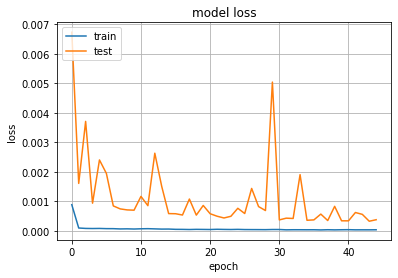

In [90]:
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a plot to visualize the loss values of the model during the training process.

The `plt.plot()` function is used to create two separate lines on the plot: one for the training loss (`history.history['loss']`) and another for the validation loss (`history.history['val_loss']`). These loss values are typically recorded during the training process.

The `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` functions are used to set the title of the plot, label the y-axis as "loss", and label the x-axis as "epoch", respectively.

The `plt.legend()` function is used to add a legend to the plot, specifying the labels "train" and "test" for the respective lines. The `loc='upper left'` argument determines the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated showing the training and validation loss values over the epochs of the training process. The model's learning progress and performance can be visualized using this visualization. In the plot, trends, overfitting and underfitting are visible, as well as the convergence of loss values. It can be used to make decisions regarding model optimization and hyperparameter tuning based on insights gained from training dynamics.

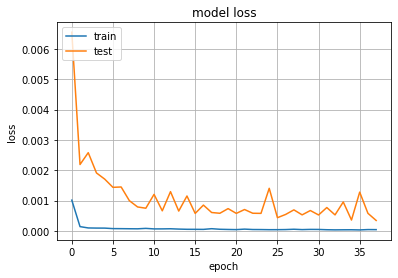

In [61]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a plot to visualize the loss values of the model during the training process. Two lines are plotted in the plot: one for the training loss, the other for the validation loss. These loss values are obtained from the `history` object, which typically stores the loss values recorded during the training process.

The `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` functions are used to set the title of the plot as "model loss", label the y-axis as "loss", and label the x-axis as "epoch", respectively.

The `plt.legend()` function is used to add a legend to the plot, with labels "train" and "test" representing the training and validation loss lines, respectively. The `loc='upper left'` argument specifies the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the training and validation loss values over the epochs of the training process. Analyzing the model's performance and learning dynamics is made easier with this plot. Comparing the training and validation losses enables insight into the model's ability to generalize to unknown data. Plots assist in understanding whether the model is overfitting or underfitting, and assist in making decisions regarding model adjustments.

In [ ]:
plt.plot(history.history['loss']) # tn
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a plot that visualizes the loss values of the model during the training process. It creates two lines on the plot: one for the training loss and one for the validation loss. These loss values are obtained from the `history` object, which typically stores the recorded loss values during the training process.

For setting the plot's title, y-axis, and x-axis labels, the plot.title(), plt.ylabel(), and plt.xlabel() functions, respectively, are used. In this case, the title is set to "model loss" and the y-axis label is set to "loss". A legend is added using the plt.legend() function. For training and validation loss lines, it specifies the labels "train" and "test". The `loc='upper left'` argument determines the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

It generates a plot illustrating the training and validation loss values over the training process. Model performance and learning dynamics can be assessed using this plot. Comparing training and validation losses enables insight into the model's ability to generalize to unknown data. In addition to assisting with decisions about model adjustments or further training iterations, the plot aids in understanding whether the model is overfitting or underfitting.

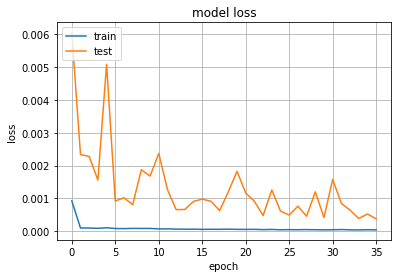

In [51]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a line plot to visualize the training and validation loss values of a model over multiple epochs. It creates two lines on the plot: one for training loss values and another for validation loss values. These values are retrieved from the `history` object, which typically stores the recorded loss values during the training process. The plots are labeled using the functions plt.title(), plt.ylabel(), and plt.xlabel(), respectively. In this case, the title is set to "model loss" and the y-axis label is set to "loss". By calling the plot.legend() function, we add labels "train" and "test" to the training and validation lines, respectively. The `loc='upper left'` argument determines the position of the legend within the plot.

A plot is generated by running this code which visualizes the training and validation loss values throughout the training process. After executing it, a plot of the results is generated. The plot shows the model's learning progress and performance. Comparing training and validation losses indicates how well the model fits the training data and generalizes to unknown data. Plots can be used to identify patterns, trends, overfitting, and underfitting, as well as to make informed decisions about model adjustments.

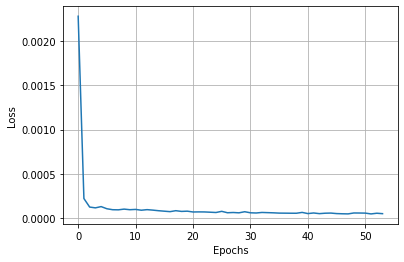

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

This code generates a line plot to visualize the loss values of a model over the epochs of the training process. The x-axis represents the epochs and the y-axis represents the loss values. The loss values are retrieved from the `history` object, which typically stores the recorded loss values during training. Labels are set using the plt.xlabel() and plt.ylabel() functions. In this case, the x-axis is labeled as "Epochs" and the y-axis is labeled as "Loss".

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the change in loss values over the epochs. An insight into the model's learning progress and performance can be gained from this plot. By examining how the loss value decreases or converges over time, the model's ability to fit the training data can be determined. Loss plots can help identify trends, patterns, and possible issues such as overfitting and underfitting. By using the plot, you can make informed decisions about model adjustments, choose the optimal number of epochs, or evaluate the training process.

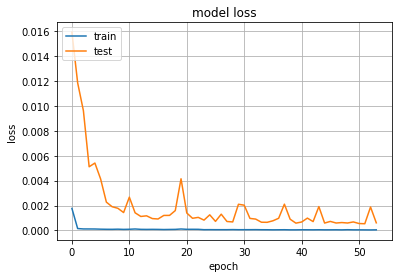

In [ ]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a line plot to visualize the training and validation loss values of a model over the epochs of the training process.

The `plt.plot()` function is used to create two lines on the plot: one representing the training loss values and another representing the validation loss values. These values are obtained from the `history` object, which typically stores the recorded loss values during the training process. Use the plot functions to set the plot's title, y-axis label, and x-axis label. In this case, the title is set to "model loss" and the y-axis label is set to "loss". A legend is added to the plot with the labels "train" and "test". The `loc='upper left'` argument specifies the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the training and validation loss values over the epochs of the training process. The plot helps assess the model's performance and learning dynamics. A comparison of the training and validation losses provides insight into the model's ability to generalize to unknown data. In making decisions regarding model adjustments or further training iterations, the plot helps in understanding whether the model is overfitting or underfitting.

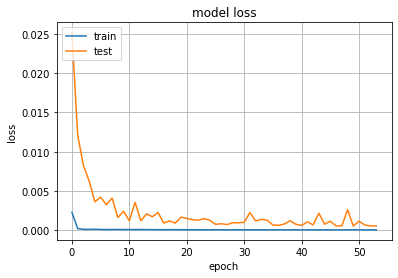

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This code generates a line plot to visualize the training and validation loss values of a model over the epochs of the training process.

The `plt.plot()` function is used to create two lines on the plot: one for the training loss values and another for the validation loss values. These loss values are retrieved from the `history` object, which typically stores the recorded loss values during the training process.

The `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` functions are used to set the title of the plot as "model loss", label the y-axis as "loss", and label the x-axis as "epoch", respectively.

The `plt.legend()` function is used to add a legend to the plot, with labels "train" and "test" representing the training and validation loss lines, respectively. The `loc='upper left'` argument determines the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the training and validation loss values over the epochs of the training process. It provides insight into the model's learning progress and generalization performance by comparing training and validation losses. It can be used to identify patterns, trends, overfitting, or underfitting. Model adjustments, hyperparameter tuning, and determining the optimal number of epochs can be made with its assistance.

In [ ]:
import tensorflow as tf

This code imports the TensorFlow library, which is a popular open-source machine learning framework developed by Google. The program gains access to TensorFlow's various features and classes. As a result, TensorFlow's powerful features can be used for building and training machine learning models in the program. A wide range of tools and APIs are provided by TensorFlow, including neural network construction, optimization algorithms, GPU acceleration, and distributed computing. It simplifies the process of implementing and training deep learning models, making it a widely adopted framework in the field of machine learning and artificial intelligence.

The import of TensorFlow at the beginning of the code indicates that the program intends to utilize TensorFlow's capabilities throughout.

In [91]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

This code performs predictions using the trained LSTM model on both the training and testing datasets. And model.predict() is called twice: first with X_train, followed by X_test. This function takes the input data and generates predictions based on the learned weights and architecture of the LSTM model.

The predictions for the training dataset are stored in the variable `train_predict`, while the predictions for the testing dataset are stored in the variable `test_predict`.

By executing this code, the model generates predicted values for both the training and testing datasets. To assess the model's performance, these predictions can be evaluated and compared with actual values.

In [92]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

This code performs a transformation to convert the predicted values back to their original scale. Using scaler.inverse_transform(), the transformed values are rescaled back to their original scale. This transformation is necessary because the predictions were obtained using scaled data to ensure consistency with the training process.

By applying the `scaler.inverse_transform()` function to both `train_predict` and `test_predict`, the predicted values are transformed back to their original scale. This allows for a meaningful comparison and evaluation of the predictions against the actual values, which are typically in the original scale.

By executing this code, the predicted values are returned to their original form, giving them a more intuitive appearance. Consequently, it is easier to interpret and analyze the model's performance.

In [93]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.75319059791041

This code calculates the root mean squared error (RMSE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to calculate the mean squared error (MSE) between the actual target values (`y_train`) and the predicted values (`train_predict`). The MSE represents the average squared difference between the predicted and actual values. By using the math.sqrt() function, the RMSE is calculated. RMSE measures the degree to which predicted values correspond to actual values, with lower values indicating better predictions. As a result of executing this code, the RMSE is calculated between predicted and actual values. Using the average deviation between the predicted and actual values, it is possible to evaluate the performance of the model.

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, test_predict)

80.09842461981907

This code calculates the mean absolute error (MAE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_absolute_error()` function from the `sklearn.metrics` module is used to calculate the mean absolute error between the actual target values (`ytest`) and the predicted values (`test_predict`). The MAE represents the average absolute difference between the predicted and actual values. This code calculates the MAE between the predicted and actual target values. The average absolute deviation between the predicted and actual values can be used to evaluate the model's performance. Having a lower MAE indicates better predictive performance, as it signifies a smaller average difference between predicted and actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, train_predict)

20.030015593076516

This code calculates the mean absolute error (MAE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_absolute_error()` function from the `sklearn.metrics` module is used to calculate the mean absolute error between the actual target values (`y_train`) and the predicted values (`train_predict`). The MAE represents the average absolute difference between the predicted and actual values. This code calculates the MAE between the predicted and actual values. Using the average absolute deviation between predicted and actual values, the model's performance can be evaluated. Low MAE indicates better predictive performance, since it indicates a smaller difference between predicted and actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, test_predict)

79.20435869404275

This code calculates the mean absolute error (MAE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_absolute_error()` function from the `sklearn.metrics` module is used to calculate the mean absolute error between the actual target values (`ytest`) and the predicted values (`test_predict`). The MAE represents the average absolute difference between the predicted and actual values. This code determines the MAE between the predicted and actual values. As a result of this, the model's performance can be assessed in terms of the average absolute deviation between the predicted and actual values. A lower MAE indicates better predictive performance, since it reflects a smaller average difference between predicted and actual values.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.391395060229833

This code calculates the root mean squared error (RMSE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to calculate the mean squared error (MSE) between the actual target values (`y_train`) and the predicted values (`train_predict`). The MSE represents the average squared difference between the predicted and actual values. The RMSE is then calculated by applying the math.sqrt() function to the MSE result. The RMSE provides a measure of how closely the predicted values match the actual values, with lower values indicating better predictive performance.

By executing this code, the RMSE between the predicted values (`train_predict`) and the actual target values (`y_train`) is computed. By comparing the predicted and actual values, we can assess the model's performance. Lower RMSE indicates better predictive performance, since it indicates a smaller average difference between predicted and actual values.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.37868881632028

In this code, the root mean squared error (RMSE) of the predictions is calculated.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to compute the mean squared error (MSE) between the actual target values (`ytest`) and the predicted values (`test_predict`). The MSE represents the average squared difference between the predicted and actual values. The square root of the MSE is obtained using the math.sqrt() function. RMSE measures the average deviation between predicted and actual values. An RMSE lower than 0.5 indicates better predictive performance, as it represents a smaller average difference between the predicted and actual values. Test_predict() calculates the RMSE based on the test data. In this way, the model can be evaluated based on how well it predicts the target variable from unseen data.

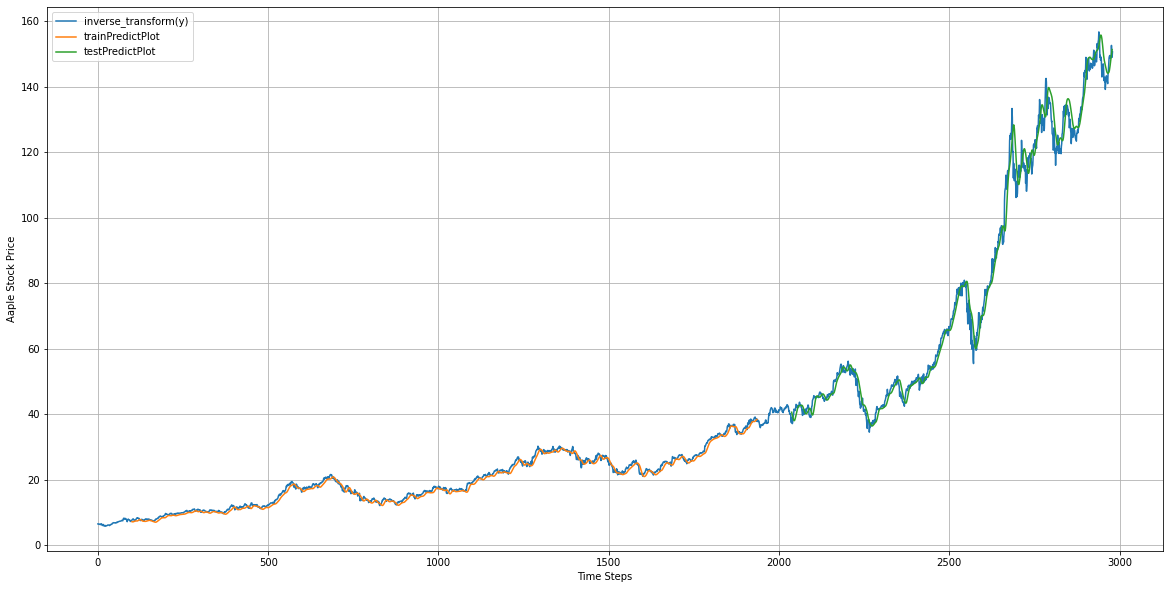

In [97]:
### Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.show()

This code generates a plot that visualizes the predictions made by the model on the training and testing data, along with the actual target values. Matplotlib.pyplot is used to create the plot. 

First, the code creates empty arrays `trainPredictPlot` and `testPredictPlot` of the same shape as the original target values (`y`), but filled with `NaN` values. These arrays will be used to plot the predicted values. Predicted values are inserted into `trainPredictPlot` and `testPredictPlot`. Predictions are aligned with actual target values in the plot by doing this. The `look_back` parameter is used to shift the predictions appropriately. The code then plots the data. It first plots the original target values (`y`) using `scaler.inverse_transform(y)` to revert the scaled values back to their original scale.

Then, it plots `trainPredictPlot` and `testPredictPlot`, which represent the predicted values for the training and testing data, respectively. This plot is the same as the original target plot with the legend and labels for the x-axis and y-axis added for clarity and comprehension. A plot is generated by executing this code that displays the actual target values, the predictions made on the training data (`trainPredictPlot`), and the predictions made on the testing data (`testPredictPlot`). The model's performance can be assessed visually by comparing the predicted and actual values.

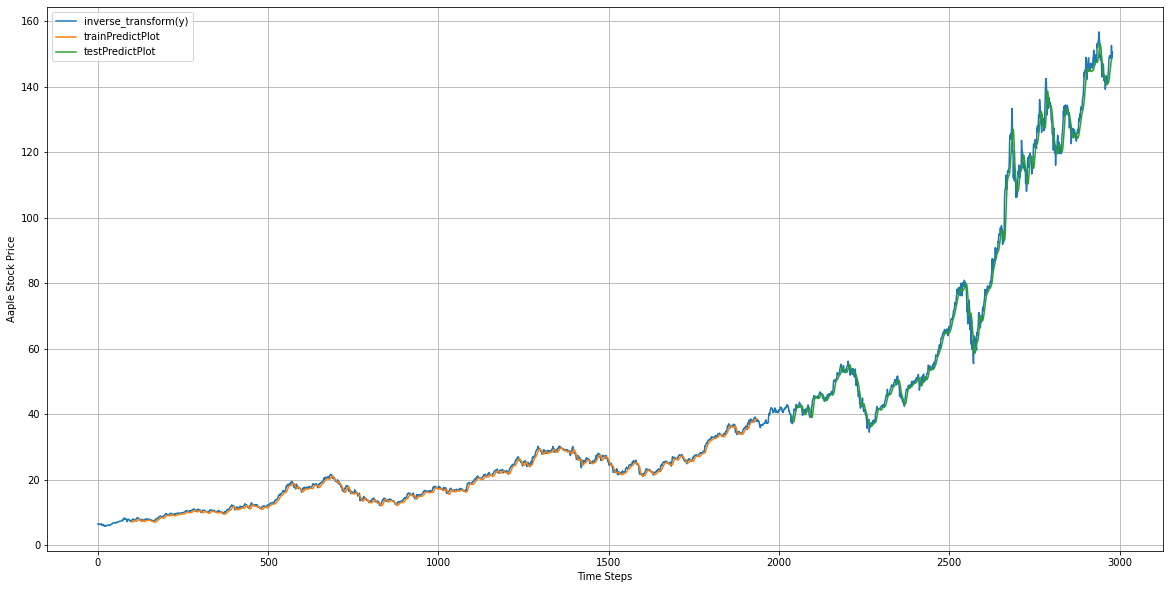

In [29]:
## Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.show()

This code generates a plot that visualizes the predictions made by the model on the training and testing data, along with the actual target values.

The plot is created using the `matplotlib.pyplot` module.

First, the code sets the value of `look_back` which represents the number of time steps used in the prediction. It creates two empty arrays, `trainPredictPlot` and `testPredictPlot`, of the same shape as the original target values (`y`). These arrays are filled with `NaN` values to prepare them for plotting.

Then, the predicted values from the training data (`train_predict`) are inserted into `trainPredictPlot`, starting from the index `look_back` and extending to the length of `train_predict`. This ensures that the predicted values are aligned with the corresponding positions in the original target values.

Similarly, the predicted values from the testing data (`test_predict`) are inserted into `testPredictPlot`, starting from the index `len(train_predict) + (look_back * 2) + 1` and extending to the index `len(y) - 1`. This ensures that the predicted values are aligned with the corresponding positions in the original target values. The code creates the plot after preparing the data. It first plots the original target values (`y`) using `scaler.inverse_transform(y)` to revert the scaled values back to their original scale.

Then, it plots `trainPredictPlot` and `testPredictPlot`, which represent the predicted values for the training and testing data, respectively. To provide clarity and understanding of the plot, the legend and labels for the x-axis and y-axis are added to the plot with these values.

By executing this code, a plot is generated that shows the actual target values, the predictions made on the training data (`trainPredictPlot`), and the predictions made on the testing data (`testPredictPlot`). By comparing the predicted and actual values, the model's performance can be assessed.

In [ ]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=1)
test_mse = model.evaluate(X_test, ytest, verbose=1)


30/30 [==============================] - 3s 108ms/step - loss: 5.4543e-04


This code evaluates the performance of the trained model by calculating the mean squared error (MSE) for both the training and testing datasets. MSE is calculated using the evaluate() function of the model object. It takes the input data (`X_train` and `X_test`) and the corresponding target values (`y_train` and `ytest`) as input. The MSE is computed for both the training and testing datasets by executing this code. The MSE represents the average squared difference between the predicted and actual values, providing a measure of the model's performance.

The resulting MSE values, `train_mse` and `test_mse`, can be stored and used to evaluate and compare the performance of the model on the training and testing datasets. As predicted values differ less from actual values, MSE values with lower values indicate better predictive performance.

In [ ]:
train_mse > test_mse

False

This code performs a comparison between the mean squared error (MSE) values obtained from evaluating the model on the training and testing datasets.

The expression `train_mse > test_mse` evaluates whether the MSE value for the training dataset (`train_mse`) is greater than the MSE value for the testing dataset (`test_mse`).

By comparing these two values, the code determines if the model performs better or worse on the training data compared to the testing data. An MSE that is greater on a training dataset than on a testing dataset indicates that the model performs worse on a training data set. MSE on a training dataset equals test MSE, so it is better on training data than it is on testing data. Conversely, if the condition evaluates to `False`, it means that the MSE on the training dataset is less than or equal to the MSE on the testing dataset, suggesting that the model performs more well or equally well on the training data than on the testing data. Insights into the model's generalization ability can be gained from this comparison. The model may be overfitting the training data and not effectively capturing the underlying patterns in it if it performs significantly worse on the training data than on the testing data. Alternatively, if the model performs similarly on both datasets, it suggests that it is able to generalize well and make accurate predictions.

- Underfitting – Validation and training error high - Overfitting – Validation error is high, training error is low - Good fit – Validation error low, slightly higher than training error - Unknown fit - Validation error low, training error 'high'


An underfitting situation occurs when both the validation error and the training error are high. It indicates that the model is not able to capture the underlying patterns in the data and is performing poorly in terms of predictive accuracy. Overfitting: This scenario has a high validation error but a low training error. As a result, the model cannot generalize to unknown data since it has memorized the training data too well. Overfitting often occurs when the model is too complex or when there is insufficient training data. Good fit is characterized by a low validation error that is slightly higher than the training error. This indicates that the model is performing well on both the training and validation data, capturing patterns in the data as well as generalizing to unseen examples in a balanced manner. A fit that is unknown refers to a situation where the validation error is low and the training error is relatively high. Despite performing well on validation data, there could be issues such as noise or inconsistencies in the training data that prevent the model from achieving a lower training error. It may be necessary to investigate this fit further since it is less common.

In [ ]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.000, Test: 0.001


For the training and testing datasets, this code prints the mean squared error (MSE). `'Train: %.3f, Test: %.3f' % (train_mse, test_mse)` is a formatted string that combines the text "Train: " with the value of `train_mse`, and "Test: " with the value of `test_mse`. The `%` operator is used to insert the values of `train_mse` and `test_mse` into the formatted string. This code prints the MSE values for the training and testing datasets. The `.3f` format specifies that three decimal places will be displayed. This printed output provides a summary of the model's performance on the training and testing datasets, allowing a quick comparison of MSEs.

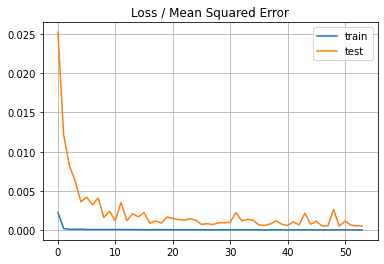

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


This code generates a plot of the loss or mean squared error (MSE) during the training process of a model. It plots two lines at once by repeatedly calling plot(). The first line represents the loss values on the training dataset, and the second line represents the loss values on the testing dataset. This object contains the recorded loss values during the training process. By accessing the `'loss'` and `'val_loss'` keys of this object, the corresponding loss values for the training and testing datasets are retrieved. The title of the plot is set to "Loss / Mean Squared Error". The `plt.legend()` function adds a legend to the plot, indicating which line corresponds to the training data and which line corresponds to the testing data.

Finally, the `plt.show()` function is called to display the plot with the loss values on the y-axis and the number of epochs on the x-axis. Using this plot, you can observe the training progress and how the model's loss converges over time.

Overfitting occurs when the validation loss is significantly greater than the training loss. The model has learned the training data too well, resulting in poor performance on unseen data. - If the validation loss is greater than the training loss (but not significantly), it suggests overfitting. The model may have memorized certain patterns in the training data that do not generalize well to new data. There is an indication of underfitting when the validation loss is lower than the training loss. The model is not capturing the underlying patterns in the data adequately, resulting in suboptimal performance on both the training and validation data. This indicates underfitting when the validation loss is significantly smaller than the training loss. Training and validation data show poor performance because the model is not complex enough to capture the patterns in the training data.

Forecasting the future 

In [ ]:
len(test_data), len(train_data) # 2021-11-02 test-data last date

(1043, 1937)

The lengths of the test_data and train_data datasets are returned by this code. The `len()` function is applied to each dataset separately.

The `len(test_data)` expression returns the number of data points in the `test_data` dataset. Similarly, the `len(train_data)` expression returns the number of data points in the `train_data` dataset. This code returns two values: the length of the `test_data` dataset and the length of the `train_data` dataset. These values represent the number of data points or observations in each dataset.

It is worth noting that the comment `# 2021-11-02 test-data last date` provides additional information about the context or significance of the test dataset, indicating that the last date of the test data corresponds to November 2, 2021.

In [ ]:
x_input=test_data[943:].reshape(1,-1)
x_input.shape

(1, 100)

From index 943 to the end of the array, this code extracts a portion of the test data array. The extracted portion is then reshaped into a new array called `x_input`.

The expression `test_data[943:]` retrieves a subset of the `test_data` array starting from index 943 and continuing until the end of the array. This subset contains a sequence of data points. A reshaping method is applied to the extracted subset of `test_data`. To change the shape of an array, use the reshape() function. In this case, it reshapes the subset into a new array with dimensions (1, N), where N represents the number of data points in the subset. This code retrieves the array's shape. The `.shape` attribute returns an array's dimensions as a tuple. You obtain information about the number of rows and columns in the array by executing this code.

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

This code performs operations on the `x_input` array to convert it into a list format. The first step is to assign the array to the variable `temp_input`. This is done to avoid modifying the original `x_input` array directly and work with a separate list representation instead.

The line `temp_input=temp_input[0].tolist()` retrieves the first element of the `temp_input` list and converts it into a standard Python list using the `.tolist()` method. This step is necessary because `temp_input` is initially a list containing a single array element, and we want to extract that element as a standalone list.

As a result of running this code, you will have a new list named `temp_input` that contains the elements of the first array from the `x_input` array. By converting the data to a list format, it is easier to manipulate and process the data.

In [ ]:
temp_input

Temp_input refers to a variable or object in the program. It represents a list that contains a sequence of values. Its exact content depends on how it is defined and modified. Various types of data can be stored, including numbers, strings, and objects. The values in `temp_input` might have been obtained from a data source or generated during the execution of the program. Understanding the function and meaning of this variable requires an analysis of the code and the context in which it is used. In programs, temp_input may be used as a temporary storage or intermediate variable to process or manipulate data.

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

These codes demonstrate the prediction for the next 10 days using a trained model. The process begins by initializing a list named lst_output, which will store the prediction. The variable `n_steps` is set to 100, indicating the number of time steps used for input sequences in the model. A while loop iterates until 30 predictions are made. Each iteration checks if there are enough data points in the temp_input list. If the length is greater than 100, it proceeds with the prediction process. The first step is to extract a subset of the temp_input without the first element. X_input becomes the prediction's input. We reshape the input to match the expected shape for the model, specifically as a 3D array with dimensions (1, n_steps, 1). Based on the input (x_input), we predict the output (yhat). The predicted value is appended to `lst_output` and added to the `temp_input` list. It means that there is not enough data to form a complete input sequence if temp_input is not longer than 100. In this case, the code reshapes the existing `x_input` and performs the prediction similarly to the previous case. This process continues until 30 predictions have been made. The final predicted values are stored in `lst_output` and printed at the end of the code. This code demonstrates how the model can be used to make predictions for future time steps.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

This code initializes two arrays, `day_new` and `day_pred`, which are used to represent the time steps for the new data and the predicted data, respectively.

The `day_new` array is created using the `np.arange` function, which generates a sequence of numbers from 1 to 100 with a step size of 1. This array represents the time steps for which the model has actual data available. Day_pred is also created with the np.arange function, but with different start and end parameters. It generates a sequence of numbers from 101 to 130, representing the time steps for which the model will make predictions.

In summary, the `day_new` array represents the time steps with known data, while the `day_pred` array represents the time steps for which the model will make predictions.

In [ ]:
import matplotlib.pyplot as plt

The code imports the Python plotting library matplotlib.pyplot. We can create various types of plots using its functions, including line plots, bar plots, scatter plots, etc. We can create visualizations of our data by importing this module and using its functions.

In [ ]:
len(y)

2980

The length of the variable y is returned by this code. Y can represent a list, array, or any other iterable object. A Python function called len() returns the number of elements in an object. In this case, it calculates the number of elements in `y` and returns the result. This value represents the total number of elements in `y`.

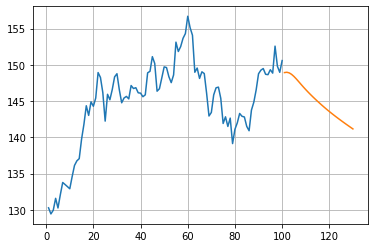

In [ ]:
plt.plot(day_new,scaler.inverse_transform(y[2880:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

The following code creates a line plot using the `plt.plot()` function from the `matplotlib.pyplot` library. Two sets of data points are plotted on the same graph. 

In the first line, plot(day_new,scaler.inverse_transform(y[2880:])) plots the original values of the time series' points. This function uses the `day_new` variable as the x-values and the corresponding subset of `y` values as the y-values. The `scaler.inverse_transform()` function is used to transform the scaled values back to their original scale. A second line of the plot displays the predicted values as predicted by the model. This function uses the `day_pred` variable as the x-values and the corresponding values from the `lst_output` list as the y-values. The scaled predicted values are again transformed to their original scale using the scaler.inverse_transform() function. The code allows users to see both the original values and the predicted values on the same graph. This allows them to compare the actual and predicted trends of the time series visually.

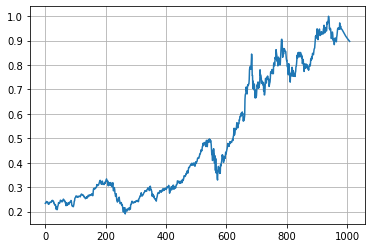

In [ ]:
df3=y.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])


This code converts the `y` variable, which represents the original values of a time series, into a list using the `tolist()` method. This list is then extended by appending the values from the lst_output list, which contains the predictions. 

Using the plot() function, the combined list of values is then plotted as a line plot starting at index 2000. This plot visualizes the trend of the original values followed by the predicted values for the time series.

This code allows a visual comparison of how well the predicted values align with the trend of the time series by plotting both original and predicted values on the same graph.

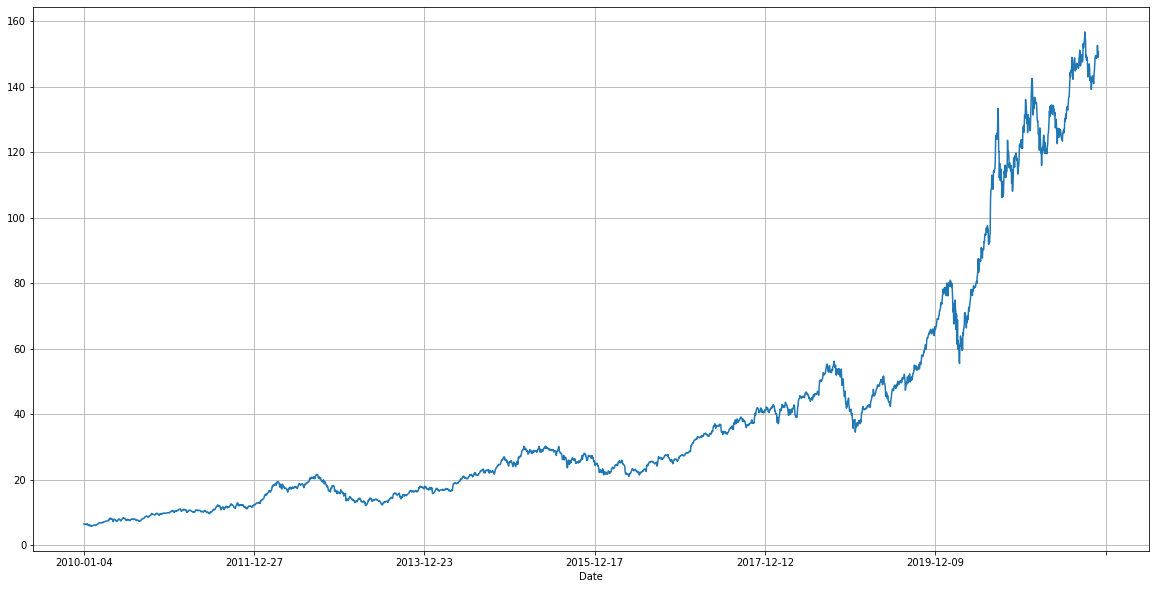

In [ ]:
df1.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

The following code plots a line graph between the 'Adj Close' values from the DataFrame 'df1' and the 'Date' column. By setting the 'Date' column as the DataFrame's index, the time series data can be plotted easily. 

To generate the line plot, the function 'plot(figsize=FIGURE_SIZE)' is called on the 'Adj Close' column. Figure size is determined by the 'figsize' parameter, which is set to 'FIGURE_SIZE'. 

A visual representation of the historical performance or trend of the 'Adj Close' variable over time is provided by plotting the 'Adj Close' values against the corresponding dates.

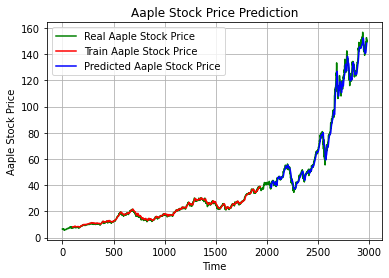

In [ ]:
# Visualising the results. with details 

plt.plot(scaler.inverse_transform(y), color='Green', label='Real Aaple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Aaple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Aaple Stock Price')

plt.title('Aaple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.legend()
plt.show()

The code generates a line graph to visualize the predicted and actual Apple stock prices. 

The first line, 'plt.plot(scaler.inverse_transform(y), color='Green', label='Real Apple Stock Price'), plots the actual stock prices (stored in 'y') after applying the inverse transformation. The stock prices are displayed in green on the graph. 'plt.plot(trainPredictPlot, color='Red', label='Train Apple Stock Price')' plots the predicted stock prices for the training data (stored in 'trainPredictPlot'). These predicted prices are displayed in red on the graph. The third line, 'plt.plot(testPredictPlot, color='Blue', label='Predicted Apple Stock Price'), plots the predicted stock prices for the test data. These predicted prices are displayed in blue on the graph. Under 'Apple Stock Price Prediction', the x-axis is labeled as 'Time Steps' and the y-axis is labeled as 'Apple Stock Price'. The legend is displayed to indicate the meaning of the different colored lines on the graph. This code provides a visual comparison between the model's predictions and the actual stock price.

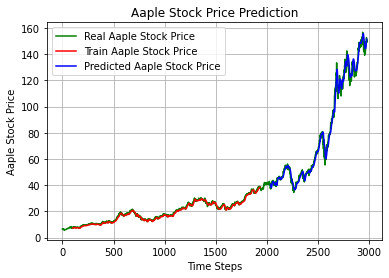

In [96]:
# Visualising the results. 

plt.plot(scaler.inverse_transform(y), color='Green', label='Real Aaple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Aaple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Aaple Stock Price')

plt.title('Aaple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.legend()
plt.show()

In this code, a line graph is used to compare Apple stock prices predicted to actual. In the first line, 'plt.plot(scaler.inverse_transform(y), color='Green', label='Real Apple Stock Price')', the inverse transformation is applied to the actual stock prices (stored in 'y'). The stock prices are displayed in green on the graph. The second line, 'plt.plot(trainPredictPlot, color='Red', label='Train Apple Stock Price'), plots the predicted stock prices for the training data. These predicted prices are displayed in red on the graph. 'plt.plot(testPredictPlot, color='Blue', label='Predicted Apple Stock Price')' plots the predicted prices for the test data. These predicted prices are displayed in blue on the graph. The following lines title the graph 'Apple Stock Price Prediction', label the x-axis as 'Time Steps', and label the y-axis as 'Apple Stock Price'. The legend is displayed to indicate the meaning of the different colored lines on the graph. This code compares the actual stock price against the model's predictions.

LSTM with bidirectional communication

In [ ]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


This code imports necessary libraries and modules for building a LSTM-based neural network model. It imports the 'random' function from the 'random' module. This function generates random numbers and is used for generating sample data in this code. 'from numpy import array' imports the 'array' function from numpy. This function is used to create arrays, which are used to store and manipulate data in numerical computations. It imports the 'cumsum' function from the Numpy module. This function calculates the cumulative sum of elements along a given axis in an array. 'from keras.models import Sequential' imports the 'Sequential' class from the 'models' module. The 'Sequential' class is used to create a sequential model, which is a linear stack of layers in a neural network. It imports the LSTM layer from the 'layers' module in the 'keras' library. LSTMs are recurrent neural network layers capable of capturing long-term dependencies in sequential data. They represent Long Short-Term Memory units. With the line 'from keras.layers import Dense', the 'Dense' layer is imported from the 'layers' module of the 'keras' library. An 'Dense' layer is one in which all neurons in a neural network are connected to each other. In the 'keras' library, the 'layers' module contains the 'TimeDistributed' layer, which is imported by the line 'from keras.layers import TimeDistributed'. The 'TimeDistributed' layer is used to apply the same layer configuration to every time step of a recurrent neural network. The line 'from keras.layers import Bidirectional' imports the 'Bidirectional' layer from the 'layers' module. This layer wraps an existing layer, such as LSTM, and processes the input sequence both forward and backward, effectively capturing data from the past and the future.

In [ ]:
tf.random.set_seed(1234)

TensorFlow's random seed is set to 1234 in this code. 

Using a random seed ensures deterministic and reproducible random numbers. In machine learning models, random initialization or random operations are often involved, and setting the random seed allows us to obtain consistent results across multiple runs or different environments.

TensorFlow will generate the same sequence of random numbers every time the code is executed if the random seed value is set to the same value. Model evaluation, debugging, or comparing the performance of different models under the same random conditions can be done this way. In summary, setting the random seed helps to create a controlled environment for TensorFlow computations, enabling reproducibility and consistency.

In [ ]:

modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam




A bidirectional LSTM (Long Short-Term Memory) neural network is defined by this code in Keras. 

A linear stack of layers is constructed using the Sequential class. First, a bidirectional LSTM layer with 100 units is added to the model. As the bidirectional LSTM layer processes the input sequence in both forward and backward directions, it captures information from the past as well as the future. The activation function used in the LSTM layer is ReLU (Rectified Linear Unit), which introduces non-linearity to the network. A dense layer with a single unit follows the LSTM layer. A dense layer represents the predicted output of the LSTM layer as a single scalar value. The model is compiled using the mean squared error loss function and the Adam optimizer. This code defines a sequential model with a bidirectional LSTM layer for a regression task, where the model predicts a single scalar value from input sequences of length 100.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

Tensorflow.keras.callbacks module contains the EarlyStopping callback class. 

During the training of a neural network model, the EarlyStopping callback is a convenient tool. Certain criteria can be used to stop training early. 

A specified metric, such as the validation loss, can be monitored during training, and the training process can be stopped if the metric does not improve after a certain number of epochs. 

As a result, overfitting is prevented and the best model is selected based on its performance on unseen data. To optimize the training process and improve overall performance, the EarlyStopping callback can be combined with other callbacks and parameters.

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
        verbose=1, mode='auto', restore_best_weights=True)

history1=modell.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
58/58 [==============================] - 10s 130ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 2/1000
58/58 [==============================] - 7s 123ms/step - loss: 6.9045e-05 - val_loss: 0.0045
Epoch 3/1000
58/58 [==============================] - 7s 123ms/step - loss: 5.0616e-05 - val_loss: 0.0214
Epoch 4/1000
58/58 [==============================] - 7s 122ms/step - loss: 4.1579e-05 - val_loss: 0.0956
Epoch 5/1000
58/58 [==============================] - 7s 123ms/step - loss: 3.6684e-05 - val_loss: 0.7866
Epoch 6/1000
58/58 [==============================] - 7s 123ms/step - loss: 3.3519e-05 - val_loss: 0.1545
Epoch 7/1000
58/58 [==============================] - 7s 123ms/step - loss: 2.8318e-05 - val_loss: 0.0865
Epoch 8/1000
58/58 [==============================] - 7s 127ms/step - loss: 2.7666e-05 - val_loss: 0.0919
Epoch 9/1000
58/58 [==============================] - 7s 123ms/step - loss: 2.5015e-05 - val_loss: 0.0526
Epoch 10/1000
58/58 [============================

It sets up the `EarlyStopping` callback with specific parameters and assigns it to the variable `monitor`. 

The `EarlyStopping` callback is configured to monitor the validation loss (`val_loss`) throughout training. If the change in validation loss between consecutive epochs is greater than or equal to the min_delta (set to 1e-3 in this case) then it is considered a significant improvement. 

As long as the validation loss does not improve after 30 epochs, the training will continue. 

If the verbose parameter is set to 1, messages about the stopping condition will be output. 

This parameter is set to 'auto', which automatically determines the direction of improvement based on the monitored quantity (in this case, validation loss). 

The `restore_best_weights` parameter is set to True, which means that the weights of the model will be restored to the ones that performed best on the validation set. 

The `modell.fit()` function is then called to train the model using the training data (`X_train` and `y_train`). The validation data (X_tests and Y_tests) are used to monitor the model's performance during training. A callback argument is set to `[monitor]`, which includes the `EarlyStopping` callback in the training process. A verbose parameter is set to 1 to display training progress. Training will run for a maximum of 1000 epochs, or until early stopping occurs. In the history1 variable, the training history is stored for further analysis or visualization.

In [ ]:
modell.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 200)              81600     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________


Using this code, you can obtain a summary of the model architecture as well as information about the number of parameters in each layer. 

It generates a summary table by calling the summary() function on the model object. The summary includes the following information for each layer: - Layer type: Specifies the type of layer in the model, such as 'Bidirectional' or 'Dense'. - Output Shape: Specifies the tensor shape of the output from each layer. It provides information about the dimensions of the output tensor, except for the batch size. Param: Number of trainable parameters. It includes both the weights and biases of the layer. - Connected to: Specifies the layers with which the current layer is connected. It shows the flow of data within the model architecture. It is useful for understanding the model's structure, the number of parameters, and the connections between layers. It can be used for debugging, optimizing, or gaining insight into the model's complexity and performance.

To ensure consistent results, the following recommendations are recommended: - Set a random seed to control the random number generation process. - Save the weights or entire model after training. By setting a random seed, the same sequence of random numbers will be generated, which can help in reproducing the same results across multiple runs. By saving the weights or the entire model, we can load it later and use it for These practices help maintain reproducibility and consistency of the code's results, allowing for better comparisons and analysis.

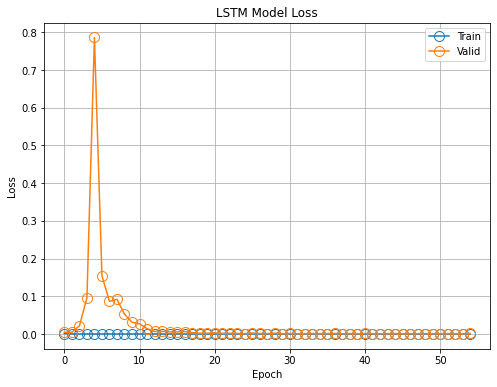

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

From the history object, this code visualizes the training and validation losses. It plots the training and validation loss values over the epochs of the model training. This is likely a custom function that plots the history object. Over the training process, the training and validation losses are plotted. On the x-axis are the epochs, while on the y-axis are the losses. The plot helps in understanding the performance of the model during training and evaluating whether the model is overfitting or underfitting. The training and validation losses can be observed by analyzing the plot. Overfitting occurs when the training loss decreases while the validation loss increases, which indicates that the model is memorizing the training data too well and not generalizing to new data. The model is learning the patterns in the data effectively if both training and validation losses decrease and remain close. In addition to providing insight into the model's training progress, the plot can also be used to assess its performance.

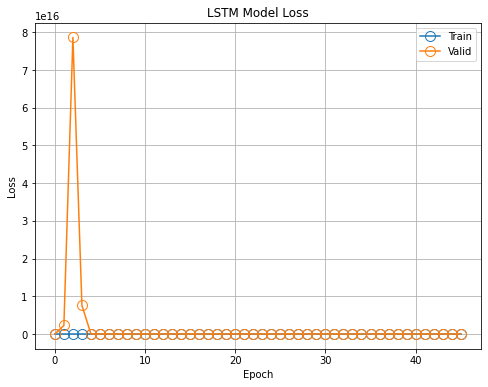

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

The code likely calls a function named "plot_1" with two arguments: history1 and 'Training / Validation Losses from History'. Through this code, the history of the model training process is visualized to visualize the training and validation losses.

The function "plot_1" takes the history object as input, which typically contains information about the loss values and other metrics recorded during the training of a machine learning model. The function uses this information to create a plot that shows the trend of the training and validation losses over the epochs or iterations of the model training. The plot helps visualize how the model's loss values have changed over time. Analysis of the loss values during training helps identify any patterns or trends. An examination of the plot will provide insights into the effectiveness of the model in learning, whether it is overfitting or underfitting, and how the training and validation losses compare. In addition to providing a brief description of what the plot represents, the string 'Training / Validation Losses from History' likely serves as the plot's title or label.

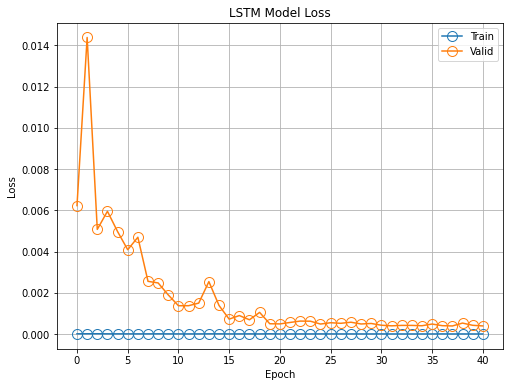

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

Based on the code, this indicates there is a function named plot_1 being called with two arguments: `history1` and the string `'Training / Validation Losses from History'`. The purpose of this code is to generate a plot that displays the training and validation losses from a given history object. This object likely contains information about the loss values during training. During training, the training loss and validation loss are recorded at each epoch or iteration. The `plot_1` function takes this history object as input and uses it to create a plot that visualizes the trend of the training and validation losses. It illustrates how the loss values change over time. The model's performance can be analyzed, and the training process can be evaluated. By examining the plot, one can identify patterns or trends in the loss values, such as convergence or fluctuations, and gain insight into the model's capability to learn from the training data. This string serves as the plot title or label, indicating what kind of information is being presented in the plot based on its description.

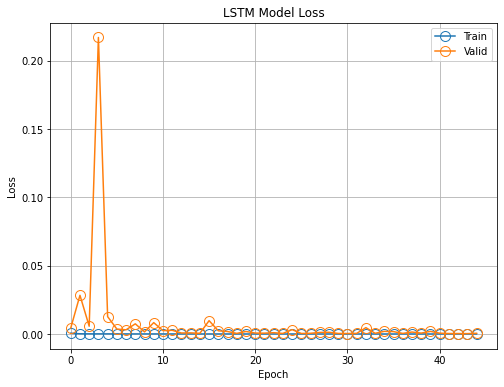

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

Plot_1(history1, 'Training / Validation Losses from History') calls plot_1 and passes it two arguments: history1 and 'Training / Validation Losses from History'. A plot is generated by this code that visualizes training and validation losses for a given history object.

The `history1` object is typically obtained after training a machine learning model and contains information about the loss values during the training process. This includes the recorded values of the training loss and validation loss at each training iteration or epoch. By using this history object, plot_1 creates a graphical representation of training and validation losses. The resulting plot allows for an analysis of the model's performance during training by visually examining the trends and patterns in the loss values.  By providing the string `'Training / Validation Losses from History'` as the second argument, the code sets a descriptive title for the plot, which helps in understanding the content of the plot at a glance.  In summary, the code `plot_1(history1, 'Training / Validation Losses from History')` generates a plot that showcases the training and Insights into the learning progress and performance of a machine learning model can be gained by analyzing validation losses from its training history.

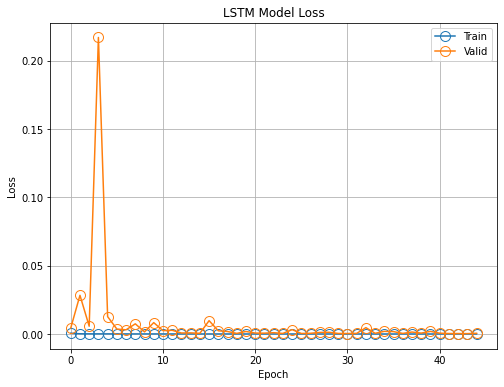

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

Plot_1(history1, 'Training / Validation Losses from History') calls plot_1 with two arguments: history1 and 'Training / Validation Losses from History'. Its purpose is to generate a plot of the training and validation losses during the training process of a machine learning model.

The `history1` object typically contains recorded information about the model's performance, such as the training loss and validation loss at each epoch or iteration. The `plot_1` function takes this history object as input and creates a graphical representation of the losses. The plot shows how the model's performance has changed over time. It allows us to observe the trends and patterns in the training and validation losses, which are important metrics for evaluating the model's accuracy and generalization capabilities.  By setting the string `'Training / Validation Losses from History'` as the plot's title, the code provides a descriptive label that summarizes the content of the plot.  In summary, the code `plot_1(history1, 'Training / Validation Losses from History')` generates a plot that visually presents the training and This allows us to assess the model's performance and track its progress by analyzing validation losses from its training history.

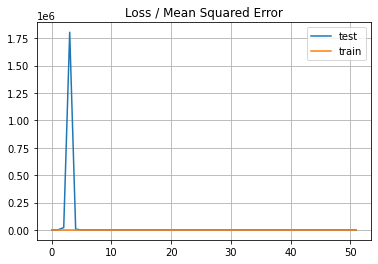

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The provided code utilizes the `pyplot` module from the `matplotlib` library to create a plot that illustrates the training and validation losses of a machine learning model.

Firstly, the line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error". This title provides a concise description of the information presented in the plot. The line pyplot.plot(history1.history['val_loss'], label='test') plots the validation loss values recorded in the history1 object. The use of the label 'test' enables us to distinguish the corresponding line in the plot and associate it with the validation loss. Similarly, pyplot.plot(history1.history['loss'], label='train') plots training loss values. The label 'train' is assigned to this line to differentiate it from the validation loss line. Pyplot.legend() adds a legend for each line with the labels 'test' and 'train'. This legend helps to identify and interpret the information presented in the plot.

Finally, the line `pyplot.show()` displays the plot on the screen, allowing the user to visualize the training and validation losses.

In summary, this code generates a plot that provides insights into the performance of a machine learning model by visualizing the trend of training and validation losses. This facilitates the assessment of the model's learning progress, overfitting or underfitting possibilities, and the effectiveness of the chosen loss function.

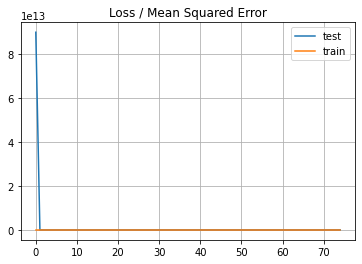

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The provided code uses the `pyplot` module from the `matplotlib` library to create a plot that visualizes the training and validation losses of a machine learning model.

The line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error". This title gives a brief description of the information being displayed in the plot. The next line plots the validation loss values in the `history1` object. Similarly, the line pyplot.plot(history1.history['loss'], label='train') plots the training loss values stored on the history1 object. The label 'train' is assigned to this line to distinguish it from the validation loss line. The line 'pyplot.legend()' provides the plot's legend. A legend with the labels test and train is added to the plot to help you identify which line corresponds to which loss type. This line displays a plot of the training loss trends on the screen and allows the user to analyze them. By using this code, you can assess the performance of a machine learning model and observe the convergence of the training by visualizing the training and validation losses. Flow.

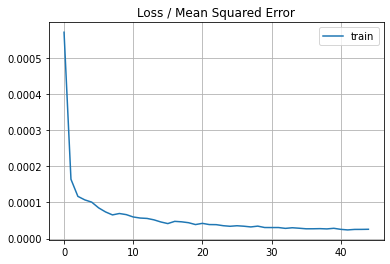

In [ ]:
pyplot.title('Loss / Mean Squared Error')
#pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The provided code uses the `pyplot` module from the `matplotlib` library to create a plot that visualizes the training loss of a machine learning model. The plot is titled "Loss / Mean Squared Error". This title provides information about the type of loss being displayed in the plot. Pyplot.plot(history1.history['loss'], label='train') plots the training loss values stored in the history1 object. The label 'train' is assigned to this line to identify it in the plot. The line 'pyplot.legend()' provides the plot's legend. This adds a legend to the plot that displays the label 'train', indicating that it represents the training loss.

Finally, the line `pyplot.show()` displays the plot on the screen, allowing the user to view and analyze the training loss trend.

In summary, this code generates a plot that visualizes the training loss of a machine learning model, providing insights into the model's learning progress and performance.

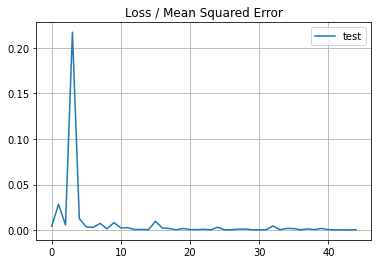

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
#pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The given code snippet uses the `pyplot` module from the `matplotlib` library to create a plot that visualizes the validation loss of a machine learning model. Its title is set to "Loss / Mean Squared Error". This title provides information about the type of loss being displayed in the plot. Following this line, pyplot plots the validation loss values stored in history1.history['val_loss'], label='test'. The label 'test' is assigned to this line to identify it in the plot. Pyplot.legend() provides a legend for the plot. The legend of the plot displays the label 'test', indicating the validation loss, and displays the plot on the screen, which enables the user to see and analyze the validation loss trend. In summary, this code generates a plot that visualizes the validation loss of a machine learning model, providing insight into the model's performance on unseen data.

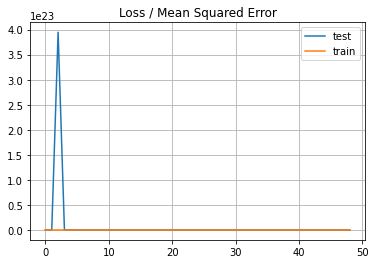

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The given code snippet uses the `pyplot` module from the `matplotlib` library to create a plot that displays the training and validation losses of a machine learning model.

The line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error". This title provides information about the type of loss being displayed in the plot. Next, "pyplot.plot(history1.history['val_loss'], label="test)" plots the validation loss values stored in history1. Likewise, the line `pyplot.plot(history1.history['loss'], label='train')` plots the training loss values stored in the `history1` object. The label 'train' is assigned to this line. The line 'pyplot.legend()' provides the plot's legend. A legend is added to the plot that displays labels 'test' and 'train', indicating which line corresponds to which validation loss or training loss. This line also displays the training and validation loss curves on the screen so the user can compare them. The code generates a plot comparing training and validation losses for machine learning models, providing insight into their performance and Underfitting or overfitting potential.

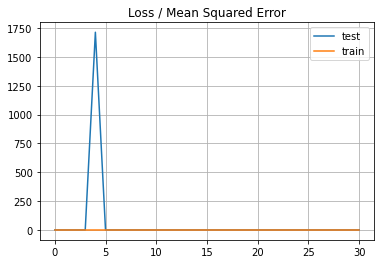

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

This code generates a plot showing the loss values of a machine learning model. 

The line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error", providing a description of the type of loss being plotted.

The next line, `pyplot.plot(history1.history['val_loss'], label='test')`, plots the validation loss values stored in the `history1` object. It is also noteworthy that pyplot.plot(history1.history['loss'], label='train') plots the training loss values contained within the `history1` object. The label 'train' is assigned to this line, indicating that it represents the training loss.  The line `pyplot.legend()` adds a legend to the plot, displaying the labels 'test' and 'train' to identify the corresponding lines.  Finally, `pyplot.show()` displays the plot on the screen, allowing the user to visualize and compare the training and validation loss curves.  In summary, this code generates a plot that shows the training and validation loss values of a machine learning model, helping to During training, evaluate the model's performance and convergence.

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='upper right')
plt.show()

The provided code generates a plot that visualizes the training and validation loss values of a machine learning model. It plots training loss and validation loss values, respectively, using the plot function plt.plot(history1.history['loss']). These values are obtained from the `history1` object.  The line `plt.title('model loss')` sets the title of the plot as "model loss", providing a description of the type of loss being plotted.  The line `plt.ylabel('loss')` assigns the label "loss" to the y-axis of the plot, indicating that it represents the loss values.  The line `plt.xlabel('epoch')` assigns the label "epoch" to the x-axis of the plot, indicating that it represents the number of training epochs.  The line `plt.legend(['train', A legend with the labels 'train' and 'test' is added to the plot, indicating which line represents the training loss and validation loss. The `loc='upper right'` parameter specifies the position of the legend on the plot.

Finally, `plt.show()` displays the plot on the screen, allowing the user to visualize and compare the training and validation loss curves.

A plot resulting from this code gives insight into the performance and convergence of a machine learning model based on its training and validation loss values.

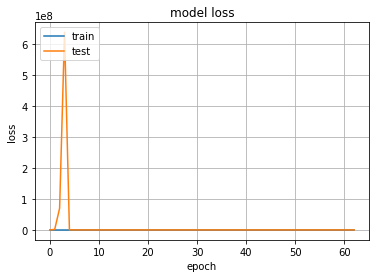

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The provided code generates a line plot that visualizes the training and validation loss values of a machine learning model. Here is the line plotting the training loss values. These values are obtained from the `history1` object. Plotting validation loss values over time is done with plt.plot(history1.history['val_loss']). Similarly, these values are also obtained from the `history1` object.  The line `plt.title('model loss')` sets the title of the plot as "model loss", providing a descriptive label for the type of loss being plotted.  The line `plt.ylabel('loss')` assigns the label "loss" to the y-axis of the plot, indicating that it represents the loss values.  The line `plt.xlabel('epoch')` assigns the label "epoch" to the x-axis of the plot, indicating that it represents the number of training epochs.  The A legend is added to the plot using the lines 'train' and 'test', which indicate which line represents the training loss and validation loss, respectively. The `loc='upper left'` parameter specifies the position of the legend on the plot.

Finally, `plt.show()` displays the plot on the screen, allowing the user to visualize and compare the training and validation loss curves.

In summary, this code generates a line plot that illustrates the training and validation loss values of a machine learning model, enabling the user to assess the model's performance and convergence over epochs.

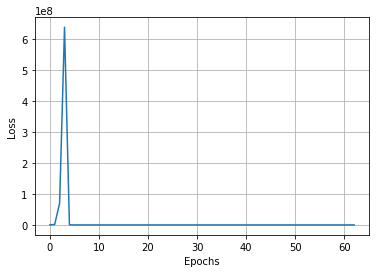

In [ ]:
plt.plot(history1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The provided code generates a line plot that visualizes the validation loss values of a machine learning model over the training epochs. This line plots the validation loss values obtained from the `history1` object. These values represent the loss of the model on a separate validation dataset during each training epoch.  The line `plt.xlabel('Epochs')` assigns the label "Epochs" to the x-axis of the plot, indicating that it represents the number of training epochs.  The line `plt.ylabel('Loss')` assigns the label "Loss" to the y-axis of the plot, indicating that it represents the loss values.  Finally, `plt.show()` displays the plot on the screen, allowing the user to visualize the trend of the validation In summary, this code generates a line plot that shows how the validation loss values of a machine learning model vary over time. Over the course of training, it provides insights into how the model's performance on validation data improves or deteriorates.

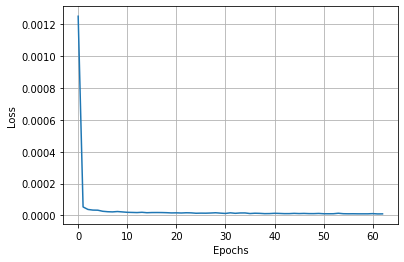

In [ ]:
plt.plot(history1.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The provided code generates a line plot that visualizes the training loss values of a machine learning model over the training epochs. Using the history1 object, we plot the training loss values. These values represent the loss of the model on the training data during each training epoch.  The line `plt.xlabel('Epochs')` assigns the label "Epochs" to the x-axis of the plot, indicating that it represents the number of training epochs.  The line `plt.ylabel('Loss')` assigns the label "Loss" to the y-axis of the plot, indicating that it represents the loss values.  Finally, `plt.show()` displays the plot on the screen, allowing the user to visualize the trend of the training loss over the This code generates a line plot that shows the variation of training loss values of a machine learning model over training epochs. During the training process, it provides insights into how well the model is learning from the training data and improving.

In [ ]:
train_predict=modell.predict(X_train)
test_predict=modell.predict(X_test)

The provided code uses a trained model (`modell`) to make predictions on the training and test datasets. The train_predict variable is used to calculate predictions based on the input data (`X_train`). These predictions represent the model's estimated outputs for the training dataset. The "test_predict" variable stores the predicted values obtained by applying the trained model to the test data. This code makes predictions on both the training and test datasets, allowing us to evaluate the model's performance on unseen data and assess its generalizability. To measure the accuracy and effectiveness of the trained model, these predictions can be compared with the actual target values.

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

By using the provided code, the predicted values are converted back to their original units or scale.

`train_predict` contains the predicted values for the training dataset, and `test_predict` contains the predicted values for the test dataset. These predictions were previously obtained using a machine learning model and may have been scaled or normalized for training purposes. This code applies an inverse transformation to restore the predictions to their original form. This method reverses the scaling or normalization that was applied to the data during the preprocessing stage. As a result, the predictions are directly comparable to the original outcome. As a result, the model's performance can be interpreted and evaluated in the context of the original data set.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

90.12779797520199

The provided code calculates the root mean squared error (RMSE) between the actual test data (`ytest`) and the predicted test data (`test_predict`). RMSEs are commonly used to assess regression model performance. It measures the average magnitude of the differences between predicted and actual values. A lower RMSE indicates that the model's predictions are closer to the true values, while a higher RMSE suggests greater deviations between the predicted and actual values. The RMSE is calculated by first importing the `sklearn.metrics` module. It then calls the mean_squared_error() function, which computes the mean squared error (MSE) between `ytest` and `test_predict`. MSE is calculated as the average of the squared differences between the predicted and actual values. Finally, the code applies the `math.sqrt()` function to the MSE to obtain the RMSE. The RMSE can be used to evaluate the model's accuracy and efficiency. Predictions with a lower RMSE are more accurate and perform better.

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.744551350170173

This code calculates the root mean squared error (RMSE) between the actual training data (`y_train`) and the predicted training data (`train_predict`). It is commonly used to evaluate regression models. Measures the average magnitude of differences between predicted and actual values. When the RMSE is lower, the model's predictions are closer to real values, while when it is higher, the model's predictions are farther from real values. In order to calculate the RMSE, the code first imports the `math` and `sklearn.metrics` modules. Afterwards, it calls the mean_squared_error() function, which calculates the mean squared error (MSE) between y_train and train_predict. A MSE is the average of the squared differences between the predicted and actual values. Finally, the code applies the `math.sqrt()` function to the MSE to obtain the RMSE. This allows us to determine how accurate and effective the model is at predicting the training data. The lower the RMSE, the better the performance and the more accurate the predictions.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

83.66756700809603

This code calculates the root mean squared error (RMSE) between the actual test data (`ytest`) and the predicted test data (`test_predict`). RMSE is a commonly used regression model metric. Measures the average magnitude of differences between predicted and actual values. A lower RMSE indicates that the model's predictions are closer to the true values, while a higher RMSE indicates a greater deviation between the predicted and actual values. In order to calculate the RMSE, the code first imports the `math` and `sklearn.metrics` modules. It then calls the `mean_squared_error()` function to calculate the mean squared error (MSE) between `ytest` and `test_predict`. In MSE, the squared difference between the predicted and actual values is averaged. Finally, the code applies the `math.sqrt()` function to the MSE to obtain the RMSE. We can evaluate the accuracy and effectiveness of the model by evaluating the RMSE. The lower the RMSE, the better the performance and the more accurate the prediction.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.288486227849145

This code calculates the root mean squared error (RMSE) as a performance metric for the training data predictions of a model. The code imports two modules: math and sklearn.metrics. The `math` module provides mathematical functions, while the `mean_squared_error` function from `sklearn.metrics` computes the mean squared error (MSE) between the training data (`y_train`) and the predictions made by the model (`train_predict`).

The MSE is calculated by taking the average of the squared differences between the predicted values and the actual values. The squared differences are then summed up, divided by the number of samples, and the square root is taken to obtain the RMSE. The RMSE can be used to assess the model's performance. The lower the RMSE, the closer the model's predictions are to the actual values, indicating greater accuracy and a better fit with the training data.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.73902439514092

This code calculates the root mean squared error (RMSE) as a performance metric for the test data predictions of a model. It imports two modules: math and sklearn.metrics. The `math` module provides mathematical functions, while the `mean_squared_error` function from `sklearn.metrics` computes the mean squared error (MSE) between the test data (`ytest`) and the predictions made by the model (`test_predict`).

The MSE is calculated by taking the average of the squared differences between the predicted values and the actual values. The squared differences are then summed up, divided by the number of samples, and the square root is taken to obtain the RMSE. This will give us an idea of the accuracy and performance of the model's predictions. When the RMSE is lower, the model's predictions are closer to the actual values, indicating better accuracy and a more accurate model.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.99294981117082

This code calculates the root mean squared error (RMSE) as a performance metric for the training data predictions of a model. It imports two modules: math and sklearn.metrics. The `math` module provides mathematical functions, while the `mean_squared_error` function from `sklearn.metrics` computes the mean squared error (MSE) between the training data (`y_train`) and the predictions made by the model (`train_predict`).

The MSE is calculated by taking the average of the squared differences between the predicted values and the actual values. The squared differences are then summed up, divided by the number of samples, and the square root is taken to obtain the RMSE. We can evaluate the model's performance by evaluating the RMSE. The lower the RMSE, the closer the predictions are to reality, indicating better accuracy and a better fit to the training data.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

88.8028633263623

This code calculates the root mean squared error (RMSE) as a performance metric for the test data predictions of a model. It imports two modules: math and sklearn.metrics. The `math` module provides mathematical functions, while the `mean_squared_error` function from `sklearn.metrics` computes the mean squared error (MSE) between the test data (`ytest`) and the predictions made by the model (`test_predict`).

The MSE is calculated by taking the average of the squared differences between the predicted values and the actual values. The squared differences are then summed up, divided by the number of samples, and the square root is taken to obtain the RMSE. RMSE is a measurement of the model's accuracy and performance. The lower the RMSE, the closer the predictions are to the actual values, indicating that the model is more accurate and better fitted to the test data.

In [ ]:
# create the list of difference between prediction and test data
predictions = modell.predict(X_test)
len(predictions)

942

It generates predictions for the test data based on a trained model (`modell`). The `predict` function is applied to the test data (`X_test`), and the resulting predictions are stored in the `predictions` list. Its length can then be calculated by using a `len` function. This indicates the number of predictions generated by the model, which corresponds to the number of samples in the test data. The model can be evaluated against the test data by generating predictions. The length of the `predictions` list allows us to analyze the model's performance for a specific number of test samples based on the number of predictions made.

In [ ]:
def plot_1(history, title):
  """function that plots the loss results of the model"""
  plt.figure(figsize=(8,6))
  plt.plot(history1.history['loss'], 'o-', mfc='none', markersize=10, 
  label='Train')
  plt.plot(history1.history['val_loss'], 'o-', mfc='none', 
  markersize=10, label='Valid')
  plt.title('LSTM Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


The provided code defines a function named `plot_1` for plotting loss results. The function takes two arguments: `history`, which represents the training history of the model, and `title`, which specifies the title of the plot. This function creates a figure with the specified size by calling plt.figure(figsize=(8,6)). For representation of training loss, plot.plot() is used with marker style 'o-'. Similarly, the validation loss values are plotted with a different marker style to distinguish them from the training loss. The plot title is 'LSTM Model Loss'. By using plt.xlabel() and plt.ylabel() respectively, the x-axis label is set to 'Epoch' and the y-axis label to 'Loss'. Using plt.legend(), a legend is created to indicate the labels for the training and validation losses. Finally, the plot is displayed using `plt.show()`.

This function provides a convenient way to visualize the loss values of a model during training and validation, allowing for better understanding of the model's performance and any potential issues such as overfitting or underfitting.

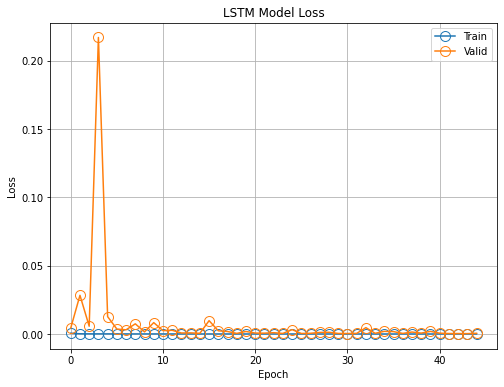

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

A function named plot_1 is called with two arguments: history1 and 'Training / Validation Losses from History'. 

This function plots the loss values from a model's training and validation history. By calling this function, it generates a plot that visualizes the trend of the training and validation losses over the course of training. The y-axis represents the difference between predicted and actual losses. The x-axis represents the epochs or iterations of training. It shows how well the model minimizes loss over time. The loss values can be examined for patterns or trends, which can help identify potential problems such as underfitting or overfitting, and aid in understanding the model's learning process.

In [ ]:
def evaluate_predictions(predictions, ytest, outliers):
    ratio = []
    differences = []
    for pred in range(len(ytest)):
        ratio.append((ytest[pred]/predictions[pred])-1)
        differences.append(abs(ytest[pred]- predictions[pred]))
    
    
    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)
    
    return ratio, differences, outliers

The provided code defines a function named `evaluate_predictions` that takes three arguments: `predictions`, `ytest`, and `outliers`. The function initializes two lists: ratio and differences. 

The loop is then repeated for each prediction in the range of `ytest`. In this loop, two calculations are performed: The ratio between the actual test value `ytest[pred]` and the corresponding predicted value `predictions[pred]` is computed, and the result is appended to the `ratio` list. The ratio represents the difference between the actual and predicted values. The absolute difference between the actual test value and the predicted value is calculated using `abs(ytest[pred] - predictions[pred])`, and the result is appended to the `differences` list. This difference represents the magnitude of the error between the actual and predicted values.  Next, a variable `n_outliers` is calculated as the integer value of the length of `differences` multiplied by the `outliers` argument, which represents the proportion of outliers to consider.  Using the `nlargest()` function from the pandas library, the `outliers` list is populated with the top `n_outliers` largest values from the `differences` list.  Finally, the function returns three values: To further analyze or evaluate the model's predictions, we can analyze ratios, differences, and outliers.

In [ ]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

Using the provided code, we call the Evaluate_Predictions function with the arguments Predictions, Ytest, and 0.01. The function returns three values: `ratio`, `differences`, and `outliers`. The ratio represents the relative difference between the actual test values and predicted values. It is calculated by dividing each actual test value by the corresponding predicted value and subtracting 1. Differences represent the absolute difference between the actual and predicted values. They indicate the magnitude of the error between the actual and predicted values. Outliers contain the biggest differences between actual and predicted values. Outliers are determined by multiplying the length of the `differences` list by 0.01 (which corresponds to 1% of the data). These outliers represent the largest errors or deviations between the actual and predicted values.

Using the returned values in the code, the model's predictions can be analyzed and examined in more detail as well as their errors can be examined.

In [ ]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

651    0.895588
649    0.908479
653    0.857305
650    0.903704
652    0.875325
654    0.834203
867    1.017309
734    0.902744
687    0.799588
dtype: float64

This code iterates over each index in the outliers variable. For each index, it assigns the corresponding value from the `predictions` list to the `outliers` list. Essentially, it updates the predicted values in the outliers list. A new list of predicted values replaces the original values on the outliers list, which were the absolute differences between actual test values and predicted values. This resulted in a list of predicted values that differed significantly from the actual test values that were identified as outliers.

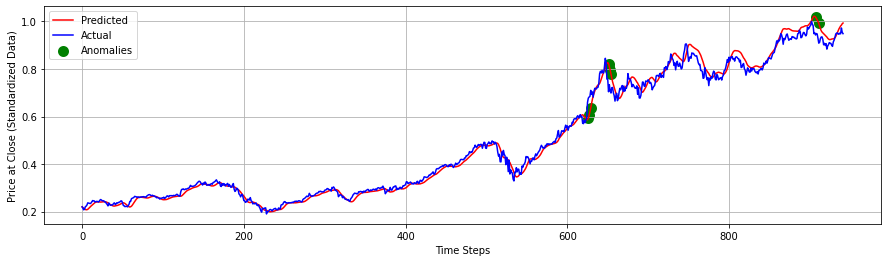

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

The provided code generates a plot to visualize the predicted values, actual values, and identified anomalies (outliers) in the data. The plot is created with a single subplot and its size is set. The predicted values are plotted in red, while the actual values are plotted in blue. The anomalies are represented as green markers at the corresponding indices on the plot using the `outliers` list. Time steps are indicated by the x-axis. The y-axis represents the price at the close of the stock, which is the target variable in this case. A legend is shown in the upper-left corner of the plot. "Predicted" represents the red line, "Actual" represents the blue line, and "Anomalies" represents the green markers. By comparing the predicted and actual values together with the identified anomalies, this plot helps to compare the model's performance and identify instances when the predictions differ significantly from the actual values.

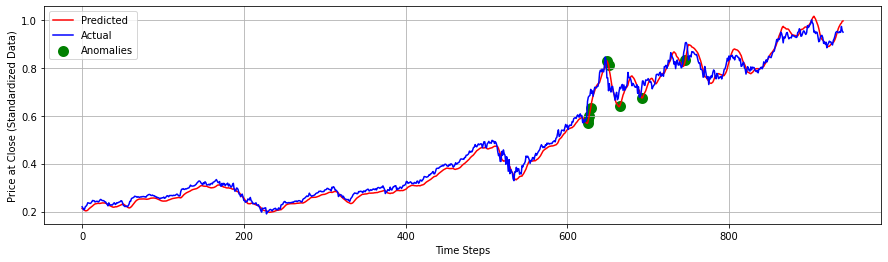

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

To compare the predicted values with the actual values of a stock price, this code generates a plot. 

Using the fig.set_figheight() and fig.set_figwidth() functions, it creates a figure and sets its size. This determines the dimensions of the plot. It then plots the predicted values using the axs.plot() function, using the predictions list as the data and 'Predicted' as the label. Similarly, it plots the actual values as a blue line using the `ytest` list as the data and 'Actual' as the label. It then adds green markers to the plot to represent anomalies, using the scatter() function. It provides the x-coordinates (time steps) where anomalies occur, and the outliers list provides the corresponding y-coordinates (values). These markers help visualize where the anomalies are present. Time steps are indicated on the plot by the x-axis. The y-axis represents the price at the close of the stock, which is the target variable in this case. Labels are provided for the x-axis ('Time Steps') and the y-axis ('Price at Close (Standardized Data)'). Located in the upper left corner, the legend indicates how the lines and markers are defined: 'Predicted' for the red line, 'Actual' for the blue line, and 'Anomalies' for the green markers. One can evaluate the model's performance and identify any significant deviations or outliers between the predicted and actual stock prices by visualizing the predicted and actual values, along with the anomalies highlighted on the plot.

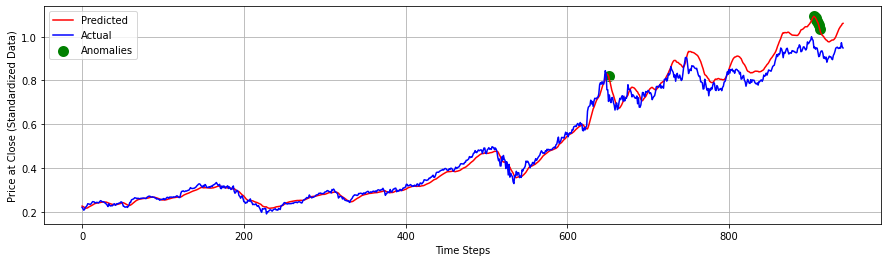

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

In this code, the predicted values of a stock price are compared to the actual values. 

First, it creates a figure and sets its size to have a height of 4 units and a width of 15 units. Using the axs.plot() function, it plots the predicted values as a red line, using the y-coordinates from the predictions. Similarly, it plots the actual values as a blue line using the `ytest` data and labels it as 'Actual'. Anomalies are represented by green markers. Outliers.index provides the x-coordinates (time steps) where anomalies occur, and outliers.list provides the corresponding y-coordinates (values). These markers help visually identify the anomalies in the data. Time steps indicate the order of the data points on the plot. In this case, the y-axis represents the stock price at close, which is the target variable. 

There are labels for the x-axis ('Time Steps') and the y-axis ('Price at Close (Standardized Data)' on the plot. The legend, positioned in the upper left corner, explains the meaning of the plotted lines and markers: 'Predicted' for the red line, 'Actual' for the blue line, and 'Anomalies' for the green markers.

As a result of visualizing the predicted and actual values of stock prices, along with the anomalies highlighted on the plot, it is possible to evaluate the model's performance and identify significant deviations or anomalies in the predicted stock prices.

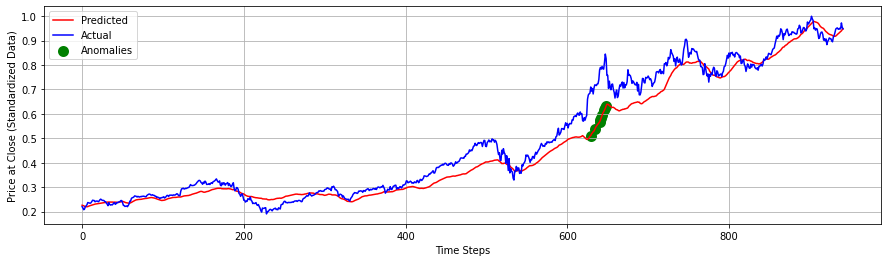

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

This code generates a plot that compares the predicted values with the actual values of a certain variable, likely representing stock prices. It first creates a figure object and assigns it to the variable `fig`. It sets the height of the figure to 4 units and the width to 15 units.

Then, it creates a set of axes within the figure and assigns it to the variable `axs`.

Next, it plots the predicted values as a red line using the `axs.plot()` function, with the `predictions` data as the y-coordinates. The label 'Predicted' is assigned to this line. In addition, it plots the actual values as a blue line using the `axs.plot()` function with the `ytest` data. The label 'Actual' is assigned to this line. The scatter() function is used to add green markers to the plot. Anomalies or unusual data points are represented by these markers. Markers' x-coordinates are provided by outliers.index, while their y-coordinates are provided by outliers. The markers are labeled as 'Anomalies'. The plot includes labels on the x-axis ('Time Steps') and the y-axis ('Price at Close (Standardized Data)'). Lines and markers are explained in the legend in the upper left corner of the chart. As a final step, the plot is displayed, allowing the user to analyze the predicted and actual values, as well as identify any anomalies or deviations in the data.

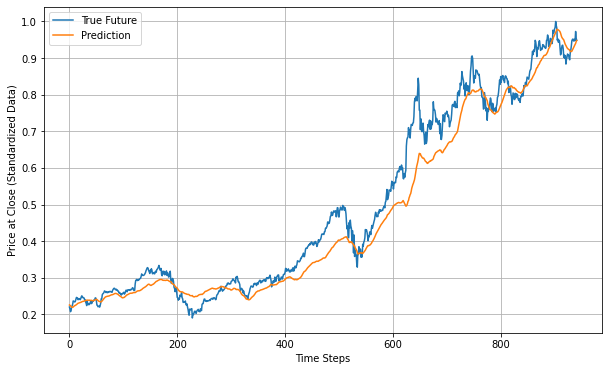

In [ ]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


This code generates a plot that compares the true future values (from the test data) with the predicted values from three different models.  The plot is created with a figure size of 10 units width and 6 units height using `plt.figure(figsize=(10, 6))`.  The x-axis represents the time steps and is labeled accordingly using `plt.xlabel('Time Steps')`.  The y-axis represents the price at close in standardized data and is labeled accordingly using `plt.ylabel('Price at Close (Standardized Data)')`. Using PLT.plot(), two lines are plotted on the graph:  1. It is plotted as a line with x-values ranging from 0 to the length of the predictions and y-values from the test data. In the example below, the label for this line is 'True Future'. Predicted values are plotted as lines with x-values ranging from 0 to the length of the predictions and y-values from the predictions. This line is labeled as 'Prediction' using `label='Prediction'`.

A legend is added to the plot using `plt.legend(loc='upper left')` to distinguish between the 'True Future' and 'Prediction' lines.

Finally, the plot is displayed using `plt.show()`, allowing the user to visually compare the true future values with the predicted values from the models.

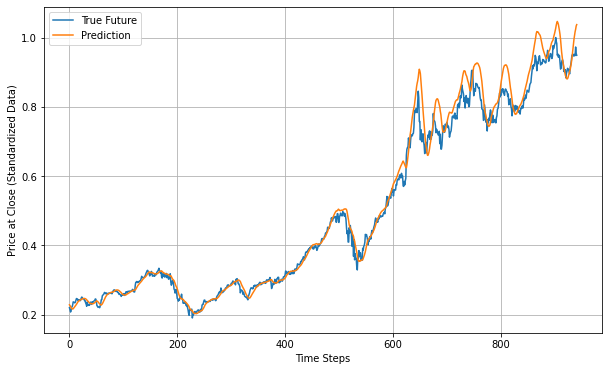

In [ ]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


As a result of this code, a plot is generated that compares the true future values (obtained from the test data) with the predicted values from three different models. The plot is created with a figure size of 10 units width and 6 units height. Time steps are represented on the x-axis. For clarity, it is labeled "Time Steps.". Note that the y-axis represents the price at close. It is labeled as "Price at Close (Standardized Data)". Two lines are plotted on the graph to represent the comparison between the true future values and the predicted future values: 1. Based on the test data, the "True Future" line represents the actual values. The y-values are determined by the np.array(ytest) and the x-values are determined by the np.arange(range_future). Prediction length corresponds to the range of x-values. In the legend, this line is labeled "True Future". Model predictions are represented by the "Prediction" line. Plotted using `np.array(predictions)` as the y-values and the same x-values as the "True Future" line. This line is labeled as "Prediction" in the legend. The legend distinguishes between the "True Future" and "Prediction". The legend is positioned in the upper-left corner of the plot. The plot is displayed using both plot.show() and plot.csv.show(), so the user can compare the true future values with the predicted values. An intuitive representation is provided of the models' performance and accuracy in predicting future values.